<a href="https://colab.research.google.com/github/ViniciusNakashima/SandDance/blob/main/projeto_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Data Science - Vinicius Nakashima Silva (21250269)

In [27]:
### Projeto Data Science

'''O projeto deve ser desenvolvido individualmente.

A análise do tema escolhido deve ser toda feita e explicada no google colab ou outra IDE python. Os trabalhos devem ser submetidos ao moodle. Podem submeter o arquivo ou o link do Github ou do Colab.

Há vários datasets na internet, escolham e passem um raio-x nos dados.

Façam perguntas e as respondam por meio dos gráficos e dissertem sobre os resultados. Analisem a normalidade da distribuição, a variância e se possível, uma análise de regressão. A qualidade e profundidade nas análise serão levados em consideração para avaliação.

O acompanhamento será feito online. Me mandem e-mail para marcar reunião de atendimento.

O prazo para entrega do projeto é dia 30/06/2023

O dataset deve ser escolhido por vcs, uma sugestão é encontrar dentre os diversos datasets disponíveis nesse link:

https://data.worldbank.org/

www.kaggle.com

https://archive.ics.uci.edu/ml/datasets.php'''

'O projeto deve ser desenvolvido individualmente.\n\nA análise do tema escolhido deve ser toda feita e explicada no google colab ou outra IDE python. Os trabalhos devem ser submetidos ao moodle. Podem submeter o arquivo ou o link do Github ou do Colab.\n\nHá vários datasets na internet, escolham e passem um raio-x nos dados.\n\nFaçam perguntas e as respondam por meio dos gráficos e dissertem sobre os resultados. Analisem a normalidade da distribuição, a variância e se possível, uma análise de regressão. A qualidade e profundidade nas análise serão levados em consideração para avaliação.\n\nO acompanhamento será feito online. Me mandem e-mail para marcar reunião de atendimento.\n\nO prazo para entrega do projeto é dia 30/06/2023\n\nO dataset deve ser escolhido por vcs, uma sugestão é encontrar dentre os diversos datasets disponíveis nesse link:\n\nhttps://data.worldbank.org/\n\nwww.kaggle.com\n\nhttps://archive.ics.uci.edu/ml/datasets.php'

### começo do projeto - início
dataset sobre atividades físicas registradas com dispositivos de rastreamento

In [160]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt
import math


atividades = pd.read_csv('/content/dailyActivity_merged - dailyActivity_merged.csv (1).csv')

In [ ]:
atividades.columns


In [343]:
# grupo com todos os IDs de cada pessoa
id_todos = ['1503960366','1624580081','1644430081','1844505072','1927972279','2022484408','2026352035','2320127002','2347167796','2873212765','3372868164','3977333714','4020332650','4057192912','4319703577','4388161847','4445114986','4558609924','4702921684','5553957443','5577150313','6117666160','6290855005','6775888955','6962181067','7007744171','7086361926','8053475328','8253242879','8378563200','8583815059','8792009665','8877689391']
print(id_todos)

['1503960366', '1624580081', '1644430081', '1844505072', '1927972279', '2022484408', '2026352035', '2320127002', '2347167796', '2873212765', '3372868164', '3977333714', '4020332650', '4057192912', '4319703577', '4388161847', '4445114986', '4558609924', '4702921684', '5553957443', '5577150313', '6117666160', '6290855005', '6775888955', '6962181067', '7007744171', '7086361926', '8053475328', '8253242879', '8378563200', '8583815059', '8792009665', '8877689391']


In [344]:
# informações do dataframe
atividades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          940 non-null    int64  
 1   ActivityDate                940 non-null    object 
 2   TotalSteps                  940 non-null    int64  
 3   TotalDistance               940 non-null    float64
 4   TrackerDistance             940 non-null    float64
 5   LoggedActivitiesDistance    940 non-null    float64
 6   VeryActiveDistance          940 non-null    float64
 7   ModeratelyActiveDistance    940 non-null    float64
 8   LightActiveDistance         940 non-null    float64
 9   SedentaryActiveDistance     940 non-null    float64
 10  VeryActiveMinutes           940 non-null    int64  
 11  FairlyActiveMinutes         940 non-null    int64  
 12  LightlyActiveMinutes        940 non-null    int64  
 13  SedentaryMinutes            940 non

In [345]:
# visão do dataframe
atividades.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Calories.1,SedentaryMinutes.1,LightlyActiveMinutes.1,FairlyActiveMinutes.1,VeryActiveMinutes.1,SedentaryActiveDistance.1,LightActiveDistance.1,ModeratelyActiveDistance.1,VeryActiveDistance.1,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,BMI
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1985,728,328,13,25,0.0,6.06,0.55,1.88,13162,1,327,346,52.599998,22.650000
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1797,776,217,19,21,0.0,4.71,0.69,1.57,10735,2,384,407,52.599998,22.650000
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1776,1218,181,11,30,0.0,3.91,0.40,2.44,10460,0,545,568,133.500000,47.540001
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1745,726,209,34,29,0.0,2.83,1.26,2.14,9762,1,412,442,56.700001,21.450001
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1863,773,221,10,36,0.0,5.04,0.41,2.71,12669,2,340,367,57.299999,21.690001


In [346]:
# resumo das colunas
atividades.describe()


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Calories.1,SedentaryMinutes.1,LightlyActiveMinutes.1,FairlyActiveMinutes.1,VeryActiveMinutes.1,SedentaryActiveDistance.1,LightActiveDistance.1,ModeratelyActiveDistance.1,VeryActiveDistance.1,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,BMI
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.00000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,2303.609574,991.210638,192.812766,13.564894,21.164894,0.001606,3.340819,0.567543,1.502681,7637.910638,1.06383,390.042553,414.920213,75.236667,25.288562
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,718.166862,301.267437,109.174700,19.987404,32.844803,0.007346,2.040655,0.883580,2.658941,5087.150742,0.26546,107.671117,107.711508,11.671331,1.351622
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,245.000000,264.000000,29.605347,21.406624
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,1828.500000,729.750000,127.000000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,3789.750000,1.00000,325.000000,346.000000,68.505611,24.296741
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,2134.000000,1057.500000,199.000000,6.000000,4.000000,0.000000,3.365000,0.240000,0.210000,7405.500000,1.00000,361.000000,384.000000,76.936085,25.369688
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,2793.250000,1229.500000,264.000000,19.000000,32.000000,0.000000,4.782500,0.800000,2.052500,10727.000000,1.00000,456.000000,485.000000,84.794778,26.140394
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,4900.000000,1440.000000,518.000000,143.000000,210.000000,0.110000,10.710000,6.480000,21.920000,36019.000000,2.00000,700.000000,712.000000,133.500000,47.540001


In [347]:
# análise geral dos indicadores

media_geral = atividades.mean()
print('Média geral')
print(media_geral)
print()

mediana_geral = atividades.median()
print('Mediana geral')
print(mediana_geral)
print()

desvio_padrao_geral = atividades.std()
print('Desvio padrão')
print(desvio_padrao_geral)
print()

minimo_geral = atividades.min()
print('Mínimo geral')
print(minimo_geral)
print()

maximo_geral = atividades.max()
print('Máximo geral')
print(maximo_geral)

Média geral
Id                            4.855407e+09
TotalSteps                    7.637911e+03
TotalDistance                 5.489702e+00
TrackerDistance               5.475351e+00
LoggedActivitiesDistance      1.081709e-01
VeryActiveDistance            1.502681e+00
ModeratelyActiveDistance      5.675426e-01
LightActiveDistance           3.340819e+00
SedentaryActiveDistance       1.606383e-03
VeryActiveMinutes             2.116489e+01
FairlyActiveMinutes           1.356489e+01
LightlyActiveMinutes          1.928128e+02
SedentaryMinutes              9.912106e+02
Calories                      2.303610e+03
Calories.1                    2.303610e+03
SedentaryMinutes.1            9.912106e+02
LightlyActiveMinutes.1        1.928128e+02
FairlyActiveMinutes.1         1.356489e+01
VeryActiveMinutes.1           2.116489e+01
SedentaryActiveDistance.1     1.606383e-03
LightActiveDistance.1         3.340819e+00
ModeratelyActiveDistance.1    5.675426e-01
VeryActiveDistance.1          1.502681e+00

<ipython-input-347-624849fb0b24>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_geral = atividades.mean()
<ipython-input-347-624849fb0b24>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mediana_geral = atividades.median()
<ipython-input-347-624849fb0b24>:13: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this

### questão 1
Existe relação entre a distância percorrida com atividades muito ativas?

In [348]:
# agrupamento dos ID e soma da distância total e também das distâncias das atividades muito ativas
dados_agrupados_distancia_total = atividades.groupby('Id')[['TotalDistance', 'VeryActiveDistance']].sum()


# lista ordenada por ID
dados_ordenados_distancia_total = dados_agrupados_distancia_total.sort_index()
dados_ordenados_distancia_total


,TotalDistance,VeryActiveDistance
Id,,
1503960366,242.099999,88.610000
1624580081,121.360001,29.120000
1644430081,158.860001,21.900000
1844505072,52.890000,0.260000
1927972279,19.670000,2.970000
2022484408,250.609998,75.069999
2026352035,107.100000,0.190000
2320127002,98.819999,3.310000
2347167796,114.400000,19.070000


In [350]:
# agrupamento dos ID e soma da distância total e também das distâncias das atividades muito ativas
dados_agrupados_distancia_total = atividades.groupby('Id')[['TotalDistance', 'VeryActiveDistance']].sum()


# ordem dos ID que percorreram maiores distâncias
dados_ordenados_distancia_total = dados_agrupados_distancia_total.sort_values(by='TotalDistance', ascending=False)
dados_ordenados_distancia_total

,TotalDistance,VeryActiveDistance
Id,,
8877689391,409.599997,205.760000
8053475328,355.729997,263.960001
4388161847,260.190003,53.300000
2022484408,250.609998,75.069999
1503960366,242.099999,88.610000
3977333714,225.509998,48.449999
4702921684,215.610000,12.940000
8378563200,214.320002,77.610000
7007744171,208.399999,62.790000


In [349]:
# agrupar por ID e calcular as médias por ID de TotalDistance e VeryActiveDistance
medias = atividades.groupby('Id')['TotalDistance', 'VeryActiveDistance'].mean()
medias

<ipython-input-349-215a51faef89>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medias = atividades.groupby('Id')['TotalDistance', 'VeryActiveDistance'].mean()


,TotalDistance,VeryActiveDistance
Id,,
1503960366,7.809677,2.858387
1624580081,3.914839,0.939355
1644430081,5.295333,0.730000
1844505072,1.706129,0.008387
1927972279,0.634516,0.095806
2022484408,8.084193,2.421613
2026352035,3.454839,0.006129
2320127002,3.187742,0.106774
2347167796,6.355556,1.059444


In [351]:
# ordem das médias
medias_ordenadas = medias.sort_values(by=['TotalDistance', 'VeryActiveDistance'], ascending=False)
medias_ordenadas

,TotalDistance,VeryActiveDistance
Id,,
8877689391,13.212903,6.637419
8053475328,11.475161,8.514839
4388161847,8.393226,1.719355
2022484408,8.084193,2.421613
7007744171,8.015385,2.415000
1503960366,7.809677,2.858387
3977333714,7.517000,1.615000
4702921684,6.955161,0.417419
8378563200,6.913548,2.503548


<Axes: xlabel='Id'>

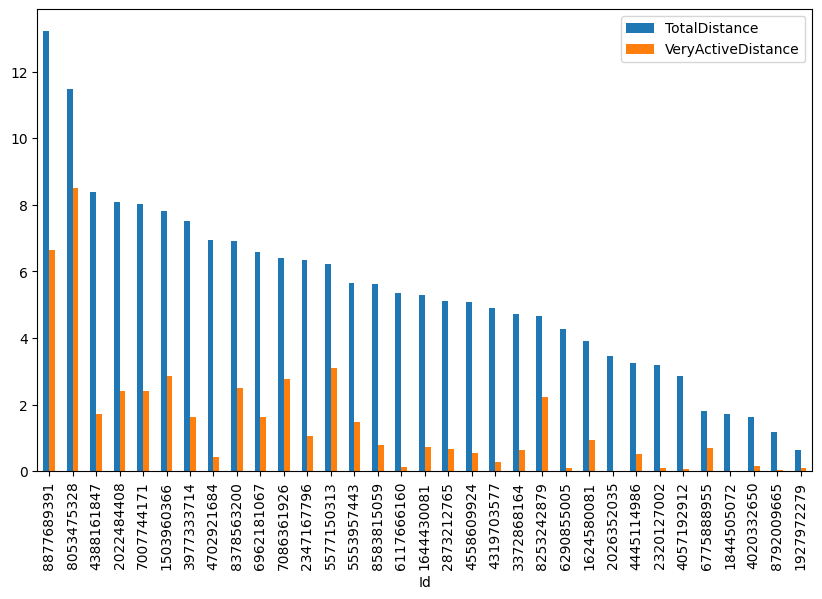

In [352]:
# gráfico de barras das médias das distâncias
medias_ordenadas.plot.bar(y=['TotalDistance', 'VeryActiveDistance'], figsize=(10, 6))

In [353]:
# resumo dos dados agrupados
dados_agrupados_distancia_total.describe()

,TotalDistance,VeryActiveDistance
count,33.000000,33.000000
mean,156.373333,42.803636
std,90.253123,57.767834
min,11.450000,0.190000
25%,98.819999,4.410000
50%,157.500000,20.960000
75%,208.399999,53.300000
max,409.599997,263.960001


In [354]:
distancia_total_x_muito_ativo = atividades[['TotalDistance', 'VeryActiveDistance']]

# correlação das 2 colunas
correlacao_distancia_total_x_muito_ativo = distancia_total_x_muito_ativo.corr()
correlacao_distancia_total_x_muito_ativo

,TotalDistance,VeryActiveDistance
TotalDistance,1.000000,0.794582
VeryActiveDistance,0.794582,1.000000


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

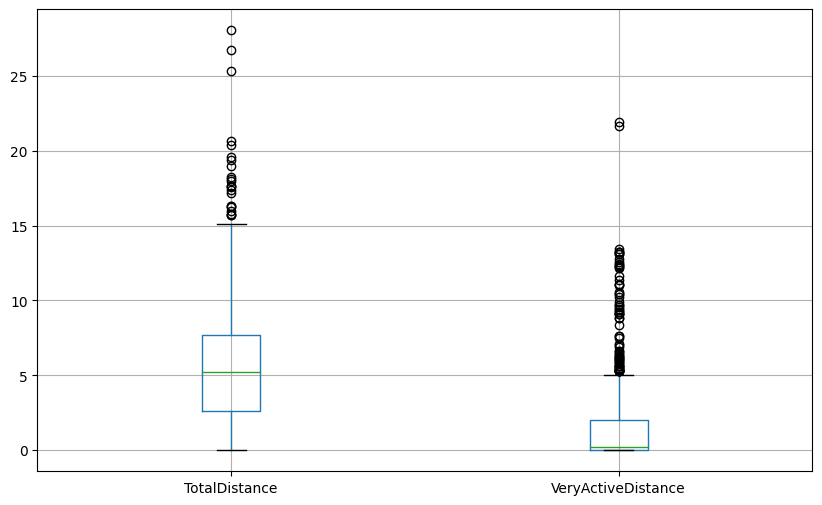

In [355]:
# boxplot
dados_boxplot = atividades[['TotalDistance', 'VeryActiveDistance']]

# gráfico boxplot
plt.figure(figsize=(10, 6))
dados_boxplot.boxplot()

display(plt)


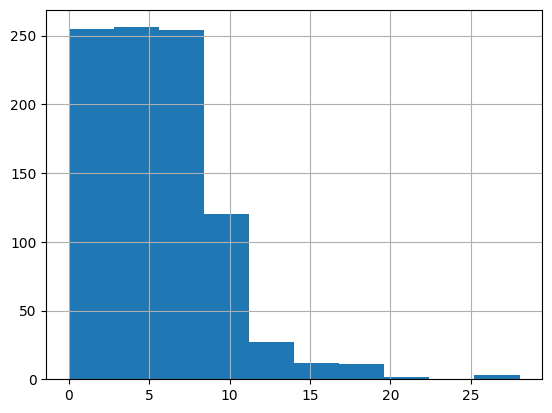

In [356]:
# histograma da distância total
dados_histograma_distancia_total = atividades['TotalDistance'].hist()


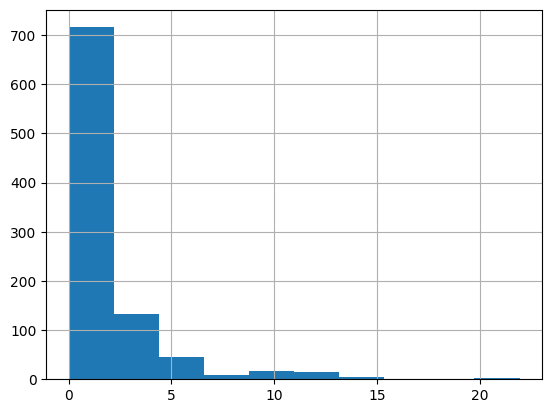

In [357]:
# histograma da distância altamente ativa
dados_histograma_muito_ativo = atividades['VeryActiveDistance'].hist()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

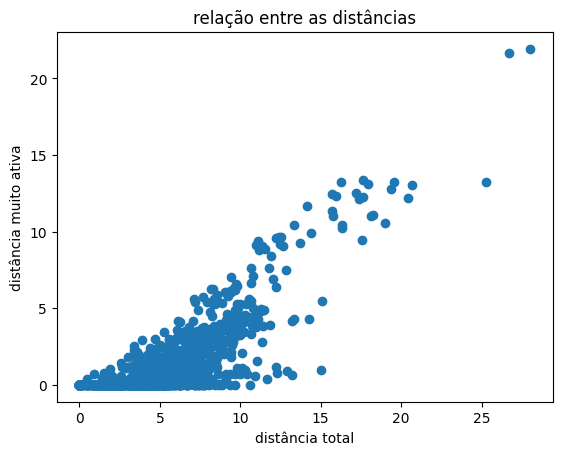

In [358]:
import matplotlib.pyplot as plt


# gráfico de dispersão
plt.scatter(atividades['TotalDistance'], atividades['VeryActiveDistance'])
plt.xlabel('distância total')
plt.ylabel('distância muito ativa')
plt.title('relação entre as distâncias')


display(plt)


In [359]:
import scipy.stats as st

# teste de shapiro pra ver a normalidade
shapiro_results = st.shapiro(distancia_total_x_muito_ativo)
shapiro_results

ShapiroResult(statistic=0.8387755155563354, pvalue=5.002074998253867e-40)

In [360]:
dados_histograma = atividades['TotalDistance']

# cálculo do zscore
z_scores = zscore(dados_histograma)

# valores originais e os Z-scores
dados_zscore = pd.DataFrame({'Valor Original': dados_histograma, 'Z-score': z_scores})

# dataframe com os valores originais e os Z-scores
#print(dados_zscore)
display(dados_zscore)

,Valor Original,Z-score
0,8.500000,0.767440
1,6.970000,0.377385
2,6.740000,0.318749
3,6.280000,0.201477
4,8.160000,0.680761
...,...,...
935,8.110000,0.668014
936,18.250000,3.253089
937,8.150000,0.678212
938,19.559999,3.587058


In [361]:
# dados
dados_boxplot = atividades[['TotalDistance', 'VeryActiveDistance']]

# tamanho da amostra
tamanho_amostra = len(dados_boxplot)

# média
media = dados_boxplot.mean()

# desvio padrão
desvio_padrao = dados_boxplot.std()


# resultados
print("intervalo de confiança da distância total':", intervalo_confianca[0][0], "-", intervalo_confianca[1][0])
print("intervalo de confiança da distância muito ativa':", intervalo_confianca[0][1], "-", intervalo_confianca[1][1])

intervalo de confiança da distância total': 7312.2847523334 - 7963.536524262345
intervalo de confiança da distância muito ativa': 5.2384901290736225 - 5.740914114902739


<Axes: >

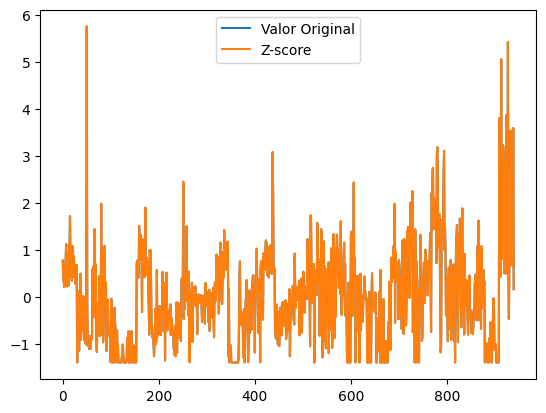

In [362]:
from scipy.stats import zscore


# cálculo do zscore
z_scores = zscore(dados_histograma)

# valores originais e os Z-scores
dados_zscore = pd.DataFrame({'Valor Original': dados_histograma, 'Z-score': z_scores})


dados_zscore.apply(zscore).plot()



### questão 2
qual a relação entre a distância total percorrida com o total de passos que uma pessoa deu?

In [363]:
# dados
distancia_total_e_passos = atividades[['TotalSteps', 'TotalDistance']]

descriçao_distancia_total_e_passos = distancia_total_e_passos.describe()
descriçao_distancia_total_e_passos


,TotalSteps,TotalDistance
count,940.000000,940.000000
mean,7637.910638,5.489702
std,5087.150742,3.924606
min,0.000000,0.000000
25%,3789.750000,2.620000
50%,7405.500000,5.245000
75%,10727.000000,7.712500
max,36019.000000,28.030001


In [364]:
# correlação entre o total de passos e a distância total
correlacao = distancia_total_e_passos['TotalSteps'].corr(distancia_total_e_passos['TotalDistance'])
correlacao
print(f'correlação entre a distância total e a quantidade de passos que uma pessoa dá é de: {correlacao}')


correlação entre a distância total e a quantidade de passos que uma pessoa dá é de: 0.9853688433590578


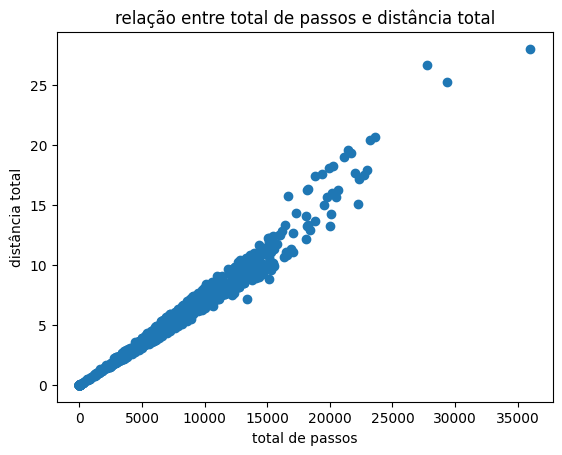

In [365]:
# gráfico de dispersão
plt.scatter(distancia_total_e_passos['TotalSteps'], distancia_total_e_passos['TotalDistance'])
plt.title('relação entre total de passos e distância total')
plt.xlabel('total de passos')
plt.ylabel('distância total')
plt.show()


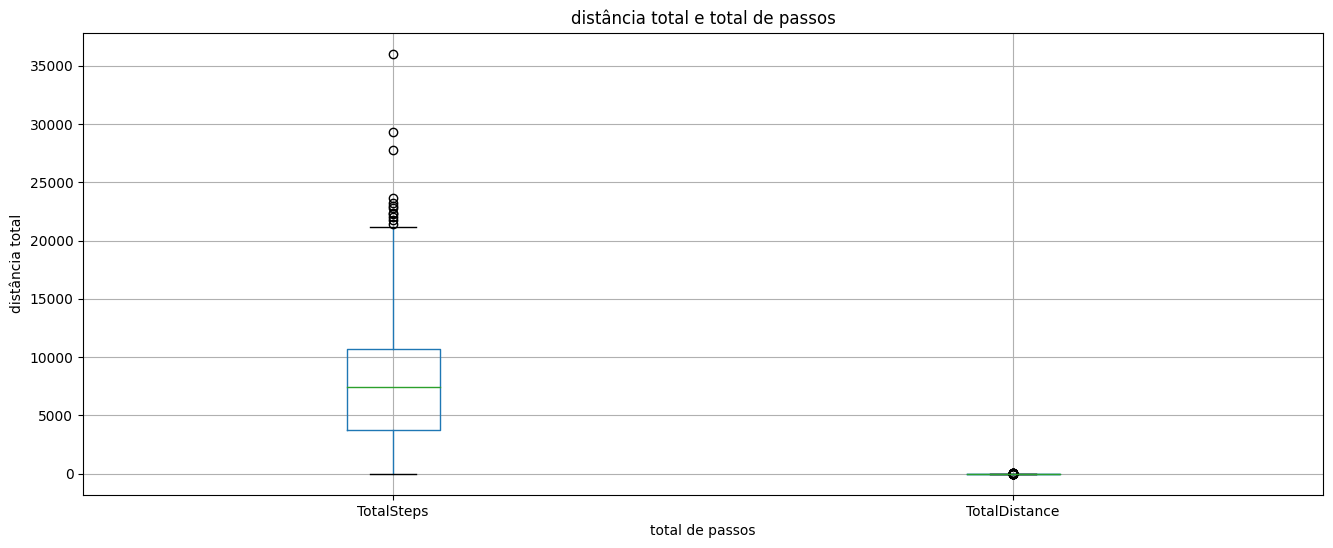

In [498]:
distancia_total_e_passos = atividades[['TotalSteps', 'TotalDistance']]

# boxplot
plt.figure(figsize=(16, 6))
distancia_total_e_passos.boxplot()
plt.title('distância total e total de passos')
plt.xlabel('total de passos')
plt.ylabel('distância total')
plt.show()


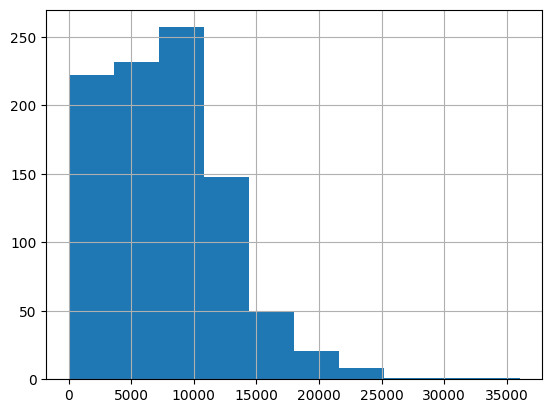

In [367]:
dados_histograma_total_passos = atividades['TotalSteps'].hist()


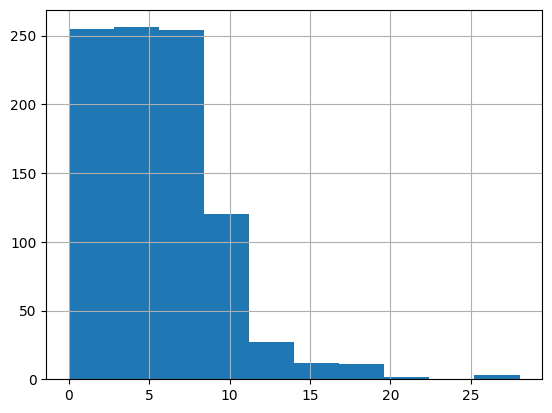

In [368]:
dados_histograma_distancia_total = atividades['TotalDistance'].hist()


In [369]:
# teste de shapiro pra ver a normalidade
shapiro_results = st.shapiro(distancia_total_e_passos)
shapiro_results

ShapiroResult(statistic=0.7555333971977234, pvalue=0.0)

In [370]:
# intervalo de confiança


# média e desvio padrão das colunas
media = distancia_total_e_passos.mean()
desvio_padrao = distancia_total_e_passos.std()

# 95%)
confianca = 0.95

# amostra
n = len(distancia_total_e_passos)

# erro padrão
erro_padrao = desvio_padrao / np.sqrt(n)

intervalo_confianca = stats.t.interval(confianca, df=n-1, loc=media, scale=erro_padrao)

for coluna in distancia_total_e_passos.columns:
    print(f'intervalo de confiança ({confianca * 100:.0f}%): {coluna}')
    print(f'média: {media[coluna]:.2f}')
    print(f'limite inferior: {intervalo_confianca[0][distancia_total_e_passos.columns.get_loc(coluna)]:.2f}')
    print(f'limite superior: {intervalo_confianca[1][distancia_total_e_passos.columns.get_loc(coluna)]:.2f}')
    print()


intervalo de confiança (95%): TotalSteps
média: 7637.91
limite inferior: 7312.28
limite superior: 7963.54

intervalo de confiança (95%): TotalDistance
média: 5.49
limite inferior: 5.24
limite superior: 5.74



     Valor Original   Z-score
0          8.500000  0.767440
1          6.970000  0.377385
2          6.740000  0.318749
3          6.280000  0.201477
4          8.160000  0.680761
..              ...       ...
935        8.110000  0.668014
936       18.250000  3.253089
937        8.150000  0.678212
938       19.559999  3.587058
939        6.120000  0.160687

[940 rows x 2 columns]


<Axes: >

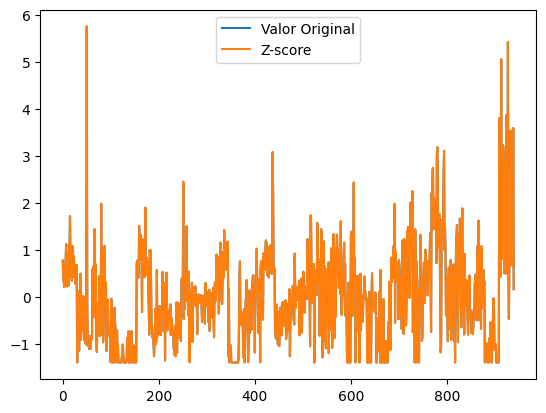

In [371]:
# cálculo do zscore
z_scores2 = zscore(dados_histograma)

# valores originais e os Z-scores
dados_zscore = pd.DataFrame({'Valor Original': dados_histograma, 'Z-score': z_scores})

print(dados_zscore)
dados_zscore.apply(zscore).plot()

### questão 3
qual a relação entre a distância moderada percorrida e a distância leve percorrida que uma pessoa deu?

In [372]:
atividades.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Calories.1',
       'SedentaryMinutes.1', 'LightlyActiveMinutes.1', 'FairlyActiveMinutes.1',
       'VeryActiveMinutes.1', 'SedentaryActiveDistance.1',
       'LightActiveDistance.1', 'ModeratelyActiveDistance.1',
       'VeryActiveDistance.1', 'StepTotal', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg', 'BMI'],
      dtype='object')

In [373]:
distancia_moderada_e_leve = atividades[['ModeratelyActiveDistance', 'LightActiveDistance']]

distancia_moderada_e_leve = distancia_moderada_e_leve.describe()
distancia_moderada_e_leve

,ModeratelyActiveDistance,LightActiveDistance
count,940.000000,940.000000
mean,0.567543,3.340819
std,0.883580,2.040655
min,0.000000,0.000000
25%,0.000000,1.945000
50%,0.240000,3.365000
75%,0.800000,4.782500
max,6.480000,10.710000


In [374]:
# correlação entre distância moderada e distância leve
correlacao_moderada_leve = distancia_moderada_e_leve['LightActiveDistance'].corr(distancia_moderada_e_leve['ModeratelyActiveDistance'])
correlacao_moderada_leve
print(f'correlação entre as distâncias em atividades moderadas e leves de uma pessoa é de: {correlacao_moderada_leve}')


correlação entre as distâncias em atividades moderadas e leves de uma pessoa é de: 0.9999908301109498


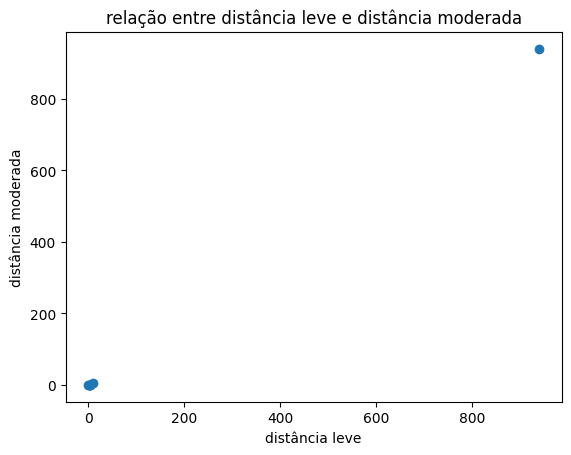

In [375]:
# gráfico de dispersão
plt.scatter(distancia_moderada_e_leve['LightActiveDistance'], distancia_moderada_e_leve['ModeratelyActiveDistance'])
plt.title('relação entre distância leve e distância moderada')
plt.xlabel('distância leve')
plt.ylabel('distância moderada')
plt.show()


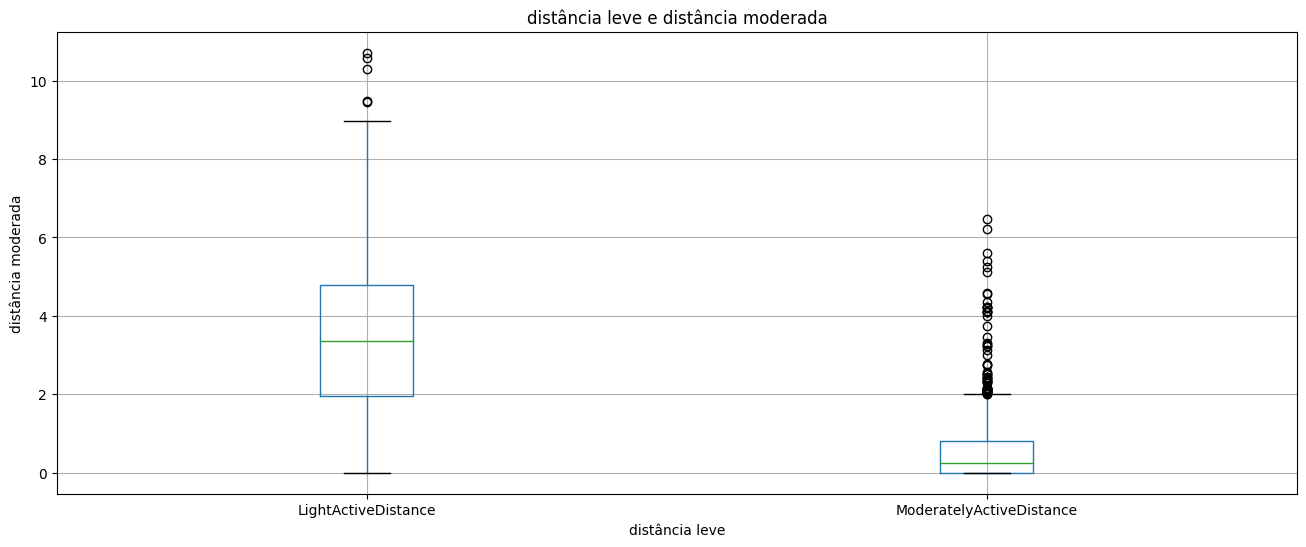

In [499]:
distancia_moderada_e_leve = atividades[['LightActiveDistance', 'ModeratelyActiveDistance']]

# boxplot
plt.figure(figsize=(16, 6))
distancia_moderada_e_leve.boxplot()
plt.title('distância leve e distância moderada')
plt.xlabel('distância leve')
plt.ylabel('distância moderada')
plt.show()


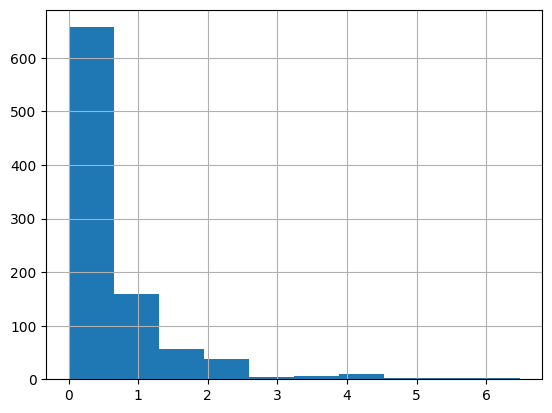

In [377]:
histograma_distancia_moderada = atividades['ModeratelyActiveDistance'].hist()


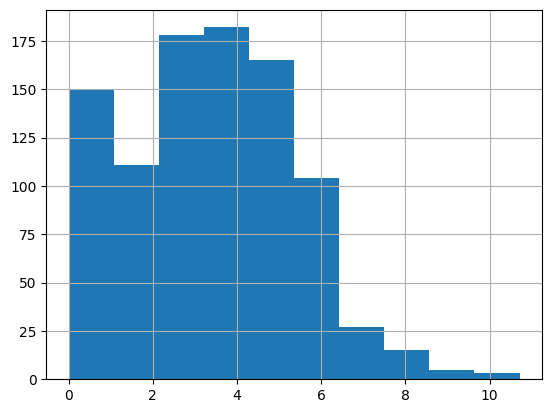

In [378]:
histograma_distancia_leve = atividades['LightActiveDistance'].hist()


In [379]:
# teste de shapiro pra ver a normalidade
shapiro_results = st.shapiro(distancia_moderada_e_leve)
shapiro_results

ShapiroResult(statistic=0.8571114540100098, pvalue=2.780626810806564e-38)

In [380]:
# intervalo de confiança


# média e desvio padrão das colunas
media_moderada_leve = distancia_moderada_e_leve.mean()
desvio_padrao = distancia_moderada_e_leve.std()

# 95%)
confianca_moderada_leve = 0.95

# amostra
n = len(distancia_moderada_e_leve)

# erro padrão
erro_padrao = desvio_padrao / np.sqrt(n)

intervalo_confianca_moderada_leve = stats.t.interval(confianca_moderada_leve, df=n-1, loc=media_moderada_leve, scale=erro_padrao)

for coluna in distancia_moderada_e_leve.columns:
    print(f'intervalo de confiança ({confianca_moderada_leve * 100:.0f}%): {coluna}')
    print(f'média: {media_moderada_leve[coluna]:.2f}')
    print(f'limite inferior: {intervalo_confianca_moderada_leve[0][distancia_moderada_e_leve.columns.get_loc(coluna)]:.2f}')
    print(f'limite superior: {intervalo_confianca_moderada_leve[1][distancia_moderada_e_leve.columns.get_loc(coluna)]:.2f}')
    print()


intervalo de confiança (95%): LightActiveDistance
média: 3.34
limite inferior: 3.21
limite superior: 3.47

intervalo de confiança (95%): ModeratelyActiveDistance
média: 0.57
limite inferior: 0.51
limite superior: 0.62



     Valor Original   Z-score
0              6.06  1.333213
1              4.71  0.671309
2              3.91  0.279069
3              2.83 -0.250454
4              5.04  0.833108
..              ...       ...
935            6.80  1.696035
936            6.24  1.421467
937            6.28  1.441079
938            5.89  1.249862
939            4.25  0.445771

[940 rows x 2 columns]


<Axes: >

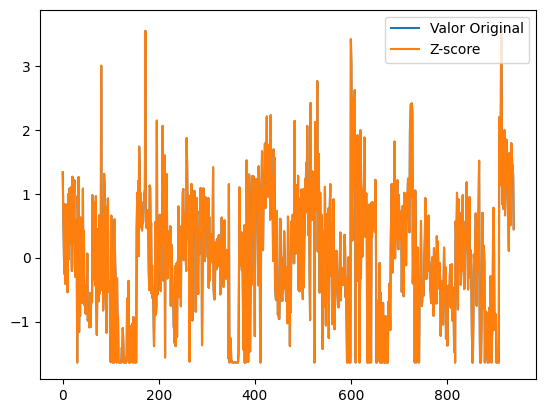

In [381]:
dados_histograma_leve = atividades['LightActiveDistance']

# cálculo do zscore das distâncias leves
z_scores_leve = zscore(dados_histograma_leve)

dados_zscore_leve = pd.DataFrame({'Valor Original': dados_histograma_leve, 'Z-score': z_scores_leve})


print(dados_zscore_leve)
dados_zscore_leve.apply(zscore).plot()

     Valor Original   Z-score
0              0.55 -0.019864
1              0.69  0.138666
2              0.40 -0.189719
3              1.26  0.784112
4              0.41 -0.178395
..              ...       ...
935            0.20 -0.416191
936            0.80  0.263226
937            0.46 -0.121777
938            0.41 -0.178395
939            0.04 -0.597369

[940 rows x 2 columns]


<Axes: >

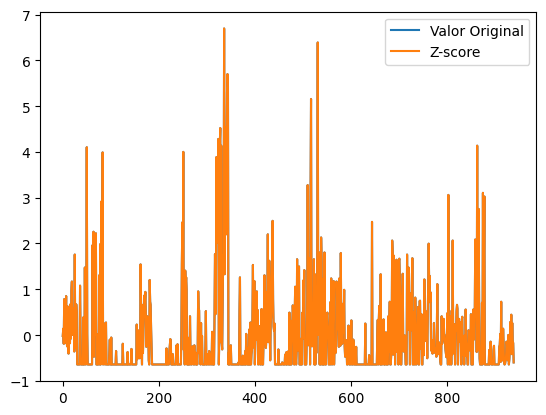

In [382]:
dados_histograma_moderado = atividades['ModeratelyActiveDistance']

# cálculo do zscore das distâncias moderadas
z_scores_moderado = zscore(dados_histograma_moderado)

dados_zscore_moderado = pd.DataFrame({'Valor Original': dados_histograma_moderado, 'Z-score': z_scores_moderado})


print(dados_zscore_moderado)
dados_zscore_moderado.apply(zscore).plot()

### questão 4
existe relação entre as calorias gastas com distâncias muito ativas?

In [383]:
atividades.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Calories.1',
       'SedentaryMinutes.1', 'LightlyActiveMinutes.1', 'FairlyActiveMinutes.1',
       'VeryActiveMinutes.1', 'SedentaryActiveDistance.1',
       'LightActiveDistance.1', 'ModeratelyActiveDistance.1',
       'VeryActiveDistance.1', 'StepTotal', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg', 'BMI'],
      dtype='object')

In [384]:
# agrupamento dos ID e soma das calorias e também das distâncias das atividades muito ativas
dados_agrupados_calorias_distancia = atividades.groupby('Id')[['Calories', 'VeryActiveDistance']].sum()


# lista ordenada por ID
dados_agrupados_calorias_distancia = dados_agrupados_calorias_distancia.sort_index()
dados_agrupados_calorias_distancia


,Calories,VeryActiveDistance
Id,,
1503960366,56309,88.610000
1624580081,45984,29.120000
1644430081,84339,21.900000
1844505072,48778,0.260000
1927972279,67357,2.970000
2022484408,77809,75.069999
2026352035,47760,0.190000
2320127002,53449,3.310000
2347167796,36782,19.070000


In [385]:
# ordem dos ID que mais queimaram calorias
dados_ordenados_calorias_distancia = dados_agrupados_calorias_distancia.sort_values(by='Calories', ascending=False)
dados_ordenados_calorias_distancia

,Calories,VeryActiveDistance
Id,,
8378563200,106534,77.610000
8877689391,106028,205.760000
5577150313,100789,93.410000
4388161847,95910,53.300000
4702921684,91932,12.940000
8053475328,91320,263.960001
8583815059,84693,24.740000
1644430081,84339,21.900000
7086361926,79557,86.220000


In [386]:
# agrupar por ID e calcular as médias por ID de Calories e VeryActiveDistance
medias_calorias_distancia = atividades.groupby('Id')['Calories', 'VeryActiveDistance'].mean()
medias_calorias_distancia

<ipython-input-386-ec83feb78522>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medias_calorias_distancia = atividades.groupby('Id')['Calories', 'VeryActiveDistance'].mean()


,Calories,VeryActiveDistance
Id,,
1503960366,1816.419355,2.858387
1624580081,1483.354839,0.939355
1644430081,2811.300000,0.730000
1844505072,1573.483871,0.008387
1927972279,2172.806452,0.095806
2022484408,2509.967742,2.421613
2026352035,1540.645161,0.006129
2320127002,1724.161290,0.106774
2347167796,2043.444444,1.059444


In [387]:
# ordem das médias
medias_ordenadas_calorias_distancia = medias_calorias_distancia.sort_values(by=['Calories', 'VeryActiveDistance'], ascending=False)
medias_ordenadas_calorias_distancia

,Calories,VeryActiveDistance
Id,,
8378563200,3436.580645,2.503548
8877689391,3420.258065,6.637419
5577150313,3359.633333,3.113667
4388161847,3093.870968,1.719355
4702921684,2965.548387,0.417419
8053475328,2945.806452,8.514839
1644430081,2811.300000,0.730000
8583815059,2732.032258,0.798065
6290855005,2599.620690,0.085517


<Axes: xlabel='Id'>

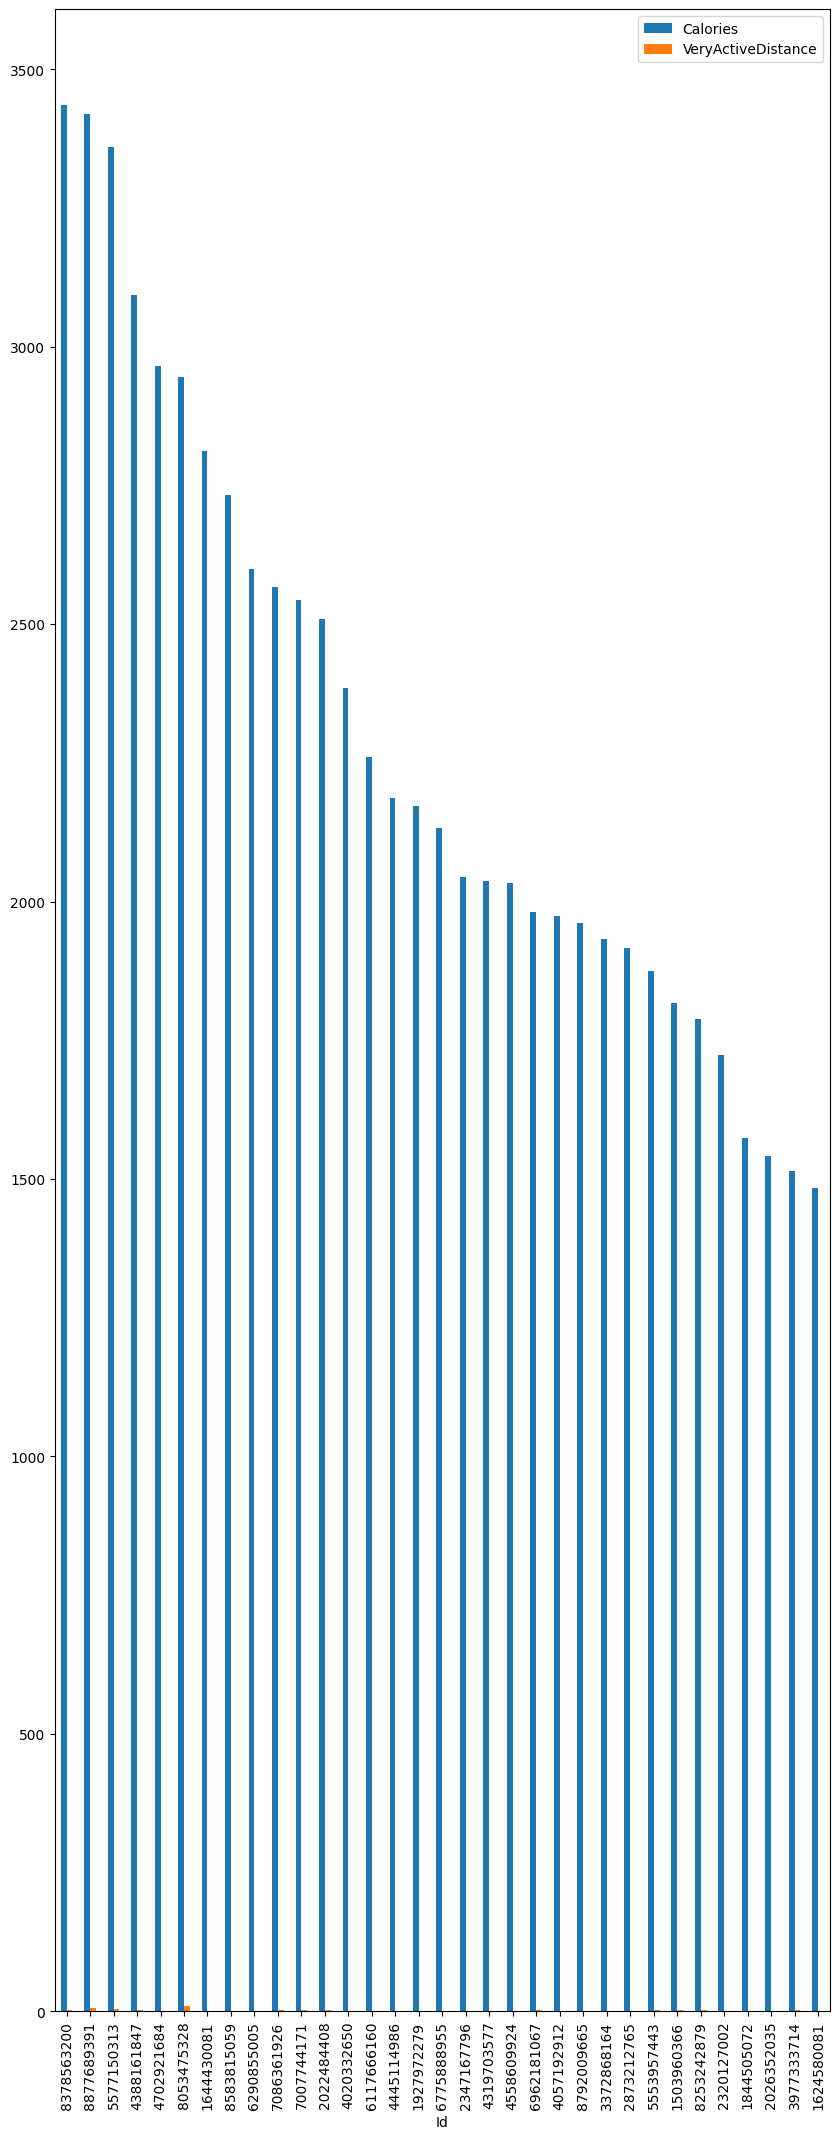

In [388]:
# gráfico de barras das médias das calorias
medias_ordenadas_calorias_distancia.plot.bar(y=['Calories', 'VeryActiveDistance'], figsize=(10, 26))

In [389]:
calorias_distancia = atividades[['Calories', 'VeryActiveDistance']]

calorias_distancia = calorias_distancia.describe()
calorias_distancia

,Calories,VeryActiveDistance
count,940.000000,940.000000
mean,2303.609574,1.502681
std,718.166862,2.658941
min,0.000000,0.000000
25%,1828.500000,0.000000
50%,2134.000000,0.210000
75%,2793.250000,2.052500
max,4900.000000,21.920000


In [390]:
# correlação entre calorias e distância muito ativas
correlacao_calorias_distancia = calorias_distancia['Calories'].corr(calorias_distancia['VeryActiveDistance'])
correlacao_calorias_distancia
print(f'correlação entre as distâncias em atividades moderadas e leves de uma pessoa é de: {correlacao_calorias_distancia}')


correlação entre as distâncias em atividades moderadas e leves de uma pessoa é de: -0.25403676204720943


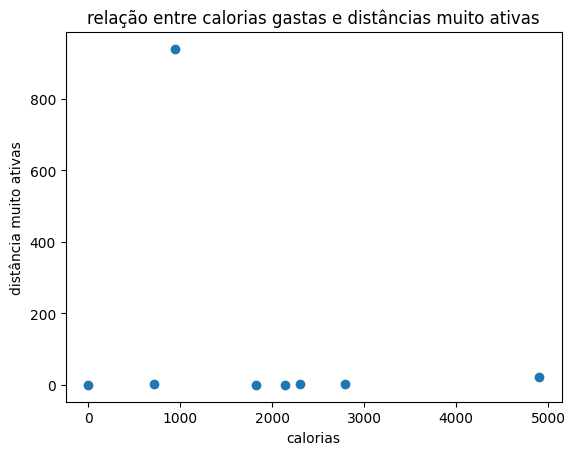

In [391]:
# gráfico de dispersão
plt.scatter(calorias_distancia['Calories'], calorias_distancia['VeryActiveDistance'])
plt.title('relação entre calorias gastas e distâncias muito ativas')
plt.xlabel('calorias')
plt.ylabel('distância muito ativas')
plt.show()


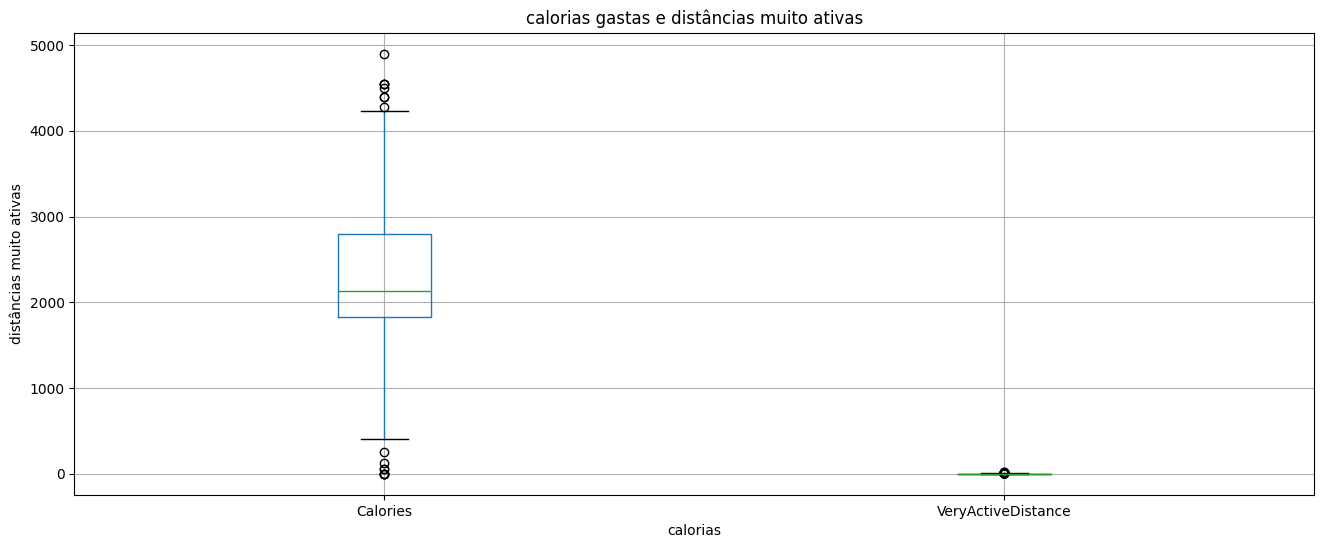

In [500]:
calorias_distancia = atividades[['Calories', 'VeryActiveDistance']]

# boxplot
plt.figure(figsize=(16, 6))
calorias_distancia.boxplot()
plt.title('calorias gastas e distâncias muito ativas')
plt.xlabel('calorias')
plt.ylabel('distâncias muito ativas')
plt.show()


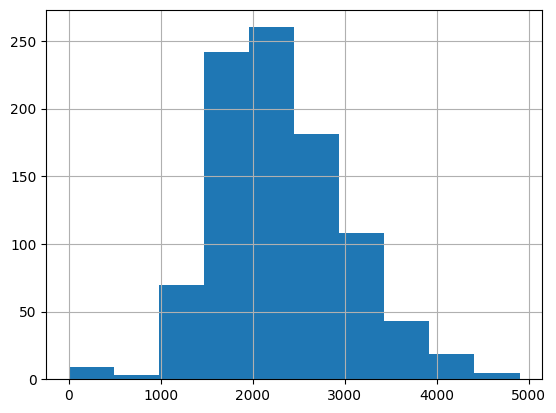

In [393]:
histograma_calorias = atividades['Calories'].hist()


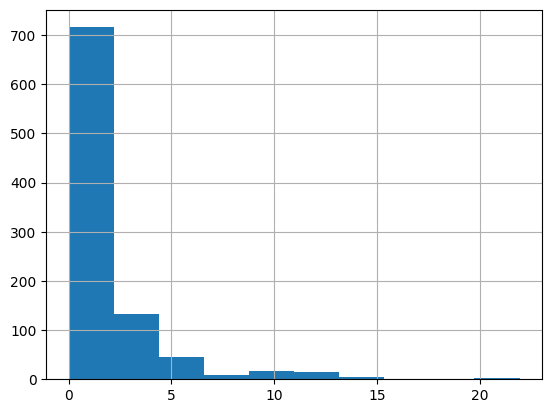

In [394]:
histograma_distancias = atividades['VeryActiveDistance'].hist()


In [395]:
# teste de shapiro pra ver a normalidade
shapiro_results = st.shapiro(calorias_distancia)
shapiro_results

ShapiroResult(statistic=0.8076585531234741, pvalue=1.1897023962117697e-42)

In [396]:
# intervalo de confiança


# média e desvio padrão das colunas
media_calorias_distancia = calorias_distancia.mean()
desvio_padrao = calorias_distancia.std()

# 95%)
confianca_calorias_distancia = 0.95

# amostra
n = len(calorias_distancia)

# erro padrão
erro_padrao = desvio_padrao / np.sqrt(n)

intervalo_calorias_distancia = stats.t.interval(confianca_calorias_distancia, df=n-1, loc=media_calorias_distancia, scale=erro_padrao)

for coluna in calorias_distancia.columns:
    print(f'intervalo de confiança ({confianca_calorias_distancia * 100:.0f}%): {coluna}')
    print(f'média: {media_calorias_distancia[coluna]:.2f}')
    print(f'limite inferior: {intervalo_calorias_distancia[0][calorias_distancia.columns.get_loc(coluna)]:.2f}')
    print(f'limite superior: {intervalo_calorias_distancia[1][calorias_distancia.columns.get_loc(coluna)]:.2f}')
    print()


intervalo de confiança (95%): Calories
média: 2303.61
limite inferior: 2257.64
limite superior: 2349.58

intervalo de confiança (95%): VeryActiveDistance
média: 1.50
limite inferior: 1.33
limite superior: 1.67



     Valor Original   Z-score
0              1985  1.333213
1              1797  0.671309
2              1776  0.279069
3              1745 -0.250454
4              1863  0.833108
..              ...       ...
935            2847  1.696035
936            3710  1.421467
937            2832  1.441079
938            3832  1.249862
939            1849  0.445771

[940 rows x 2 columns]


<Axes: >

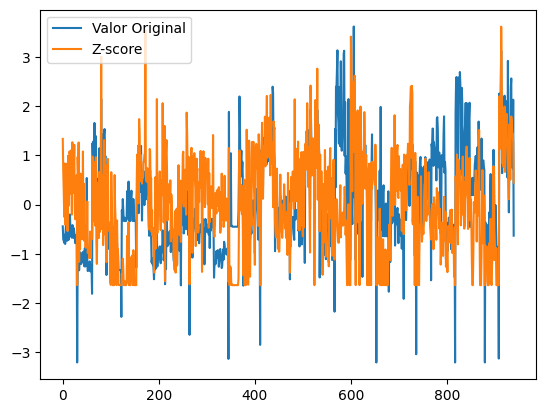

In [397]:
dados_histograma_calorias = atividades['Calories']

# cálculo do zscore das calorias
z_scores_calorias = zscore(dados_histograma_leve)

dados_zscore_calorias = pd.DataFrame({'Valor Original': dados_histograma_calorias, 'Z-score': z_scores_calorias})


print(dados_zscore_calorias)
dados_zscore_calorias.apply(zscore).plot()

### questão 5
qual a relação entre distâncias de atividades moderadas e minutos razoavelmente ativos?

In [398]:
atividades.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Calories.1',
       'SedentaryMinutes.1', 'LightlyActiveMinutes.1', 'FairlyActiveMinutes.1',
       'VeryActiveMinutes.1', 'SedentaryActiveDistance.1',
       'LightActiveDistance.1', 'ModeratelyActiveDistance.1',
       'VeryActiveDistance.1', 'StepTotal', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg', 'BMI'],
      dtype='object')

In [399]:
# agrupamento dos ID e soma dos minutos razoáveis e também das distâncias das atividades moderadas
dados_agrupados_minutos_moderados = atividades.groupby('Id')[['FairlyActiveMinutes', 'ModeratelyActiveDistance']].sum()


# lista ordenada por ID
dados_agrupados_minutos_moderados = dados_agrupados_minutos_moderados.sort_index()
dados_agrupados_minutos_moderados


,FairlyActiveMinutes,ModeratelyActiveDistance
Id,,
1503960366,594,24.620000
1624580081,180,11.180000
1644430081,641,28.530000
1844505072,40,1.520000
1927972279,24,0.970000
2022484408,600,22.320000
2026352035,8,0.350000
2320127002,80,3.030000
2347167796,370,19.350000


In [400]:
# ordem dos ID com mais minutos
dados_ordenados_minutos_moderados = dados_agrupados_minutos_moderados.sort_values(by='FairlyActiveMinutes', ascending=False)
dados_ordenados_minutos_moderados

,FairlyActiveMinutes,ModeratelyActiveDistance
Id,,
3977333714,1838,82.529999
5577150313,895,19.740000
4702921684,807,40.450000
7086361926,786,23.970000
8583815059,688,31.640000
1644430081,641,28.530000
4388161847,631,27.960000
2022484408,600,22.320000
1503960366,594,24.620000


In [401]:
# agrupar por ID e calcular as médias por ID de FairlyActiveMinutes e ModeratelyActiveDistance
medias_minutos_moderados = atividades.groupby('Id')['FairlyActiveMinutes', 'ModeratelyActiveDistance'].mean()
medias_minutos_moderados

<ipython-input-401-7e7034525f4e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medias_minutos_moderados = atividades.groupby('Id')['FairlyActiveMinutes', 'ModeratelyActiveDistance'].mean()


,FairlyActiveMinutes,ModeratelyActiveDistance
Id,,
1503960366,19.161290,0.794194
1624580081,5.806452,0.360645
1644430081,21.366667,0.951000
1844505072,1.290323,0.049032
1927972279,0.774194,0.031290
2022484408,19.354839,0.720000
2026352035,0.258065,0.011290
2320127002,2.580645,0.097742
2347167796,20.555556,1.075000


In [402]:
# ordem das médias
medias_ordenadas_minutos_moderados = medias_minutos_moderados.sort_values(by=['FairlyActiveMinutes', 'ModeratelyActiveDistance'], ascending=False)
medias_ordenadas_minutos_moderados

,FairlyActiveMinutes,ModeratelyActiveDistance
Id,,
3977333714,61.266667,2.751000
5577150313,29.833333,0.658000
4702921684,26.032258,1.304839
7086361926,25.354839,0.773226
8583815059,22.193548,1.020645
1644430081,21.366667,0.951000
2347167796,20.555556,1.075000
4388161847,20.354839,0.901935
2022484408,19.354839,0.720000


<Axes: xlabel='Id'>

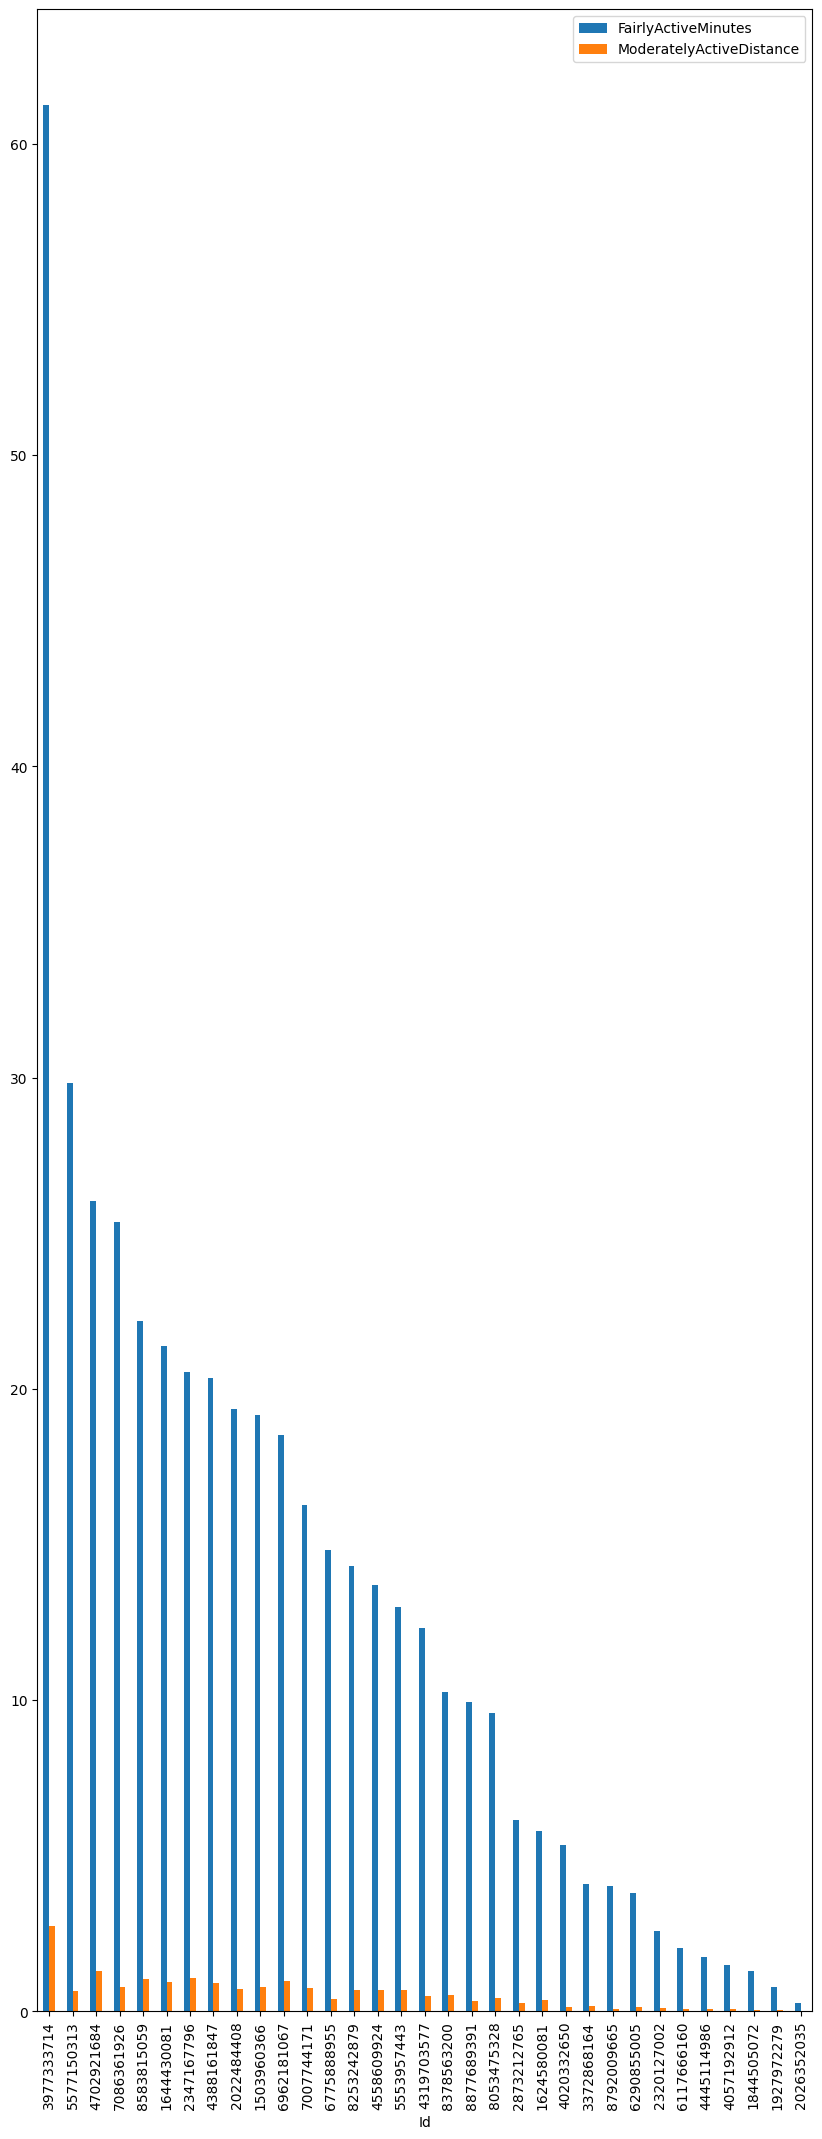

In [403]:
# gráfico de barras das médias dos minutos
medias_ordenadas_minutos_moderados.plot.bar(y=['FairlyActiveMinutes', 'ModeratelyActiveDistance'], figsize=(10, 26))

In [404]:
minutos_moderados = atividades[['FairlyActiveMinutes', 'ModeratelyActiveDistance']]

minutos_moderados = minutos_moderados.describe()
minutos_moderados

,FairlyActiveMinutes,ModeratelyActiveDistance
count,940.000000,940.000000
mean,13.564894,0.567543
std,19.987404,0.883580
min,0.000000,0.000000
25%,0.000000,0.000000
50%,6.000000,0.240000
75%,19.000000,0.800000
max,143.000000,6.480000


In [405]:
# correlação entre minutos razoáveis e distância moderada
correlacao_minutos_moderados = minutos_moderados['FairlyActiveMinutes'].corr(minutos_moderados['ModeratelyActiveDistance'])
correlacao_minutos_moderados
print(f'correlação entre minutos razoáveis e distância moderada em atividades de uma pessoa é de: {correlacao_minutos_moderados}')


correlação entre minutos razoáveis e distância moderada em atividades de uma pessoa é de: 0.9903344603484516


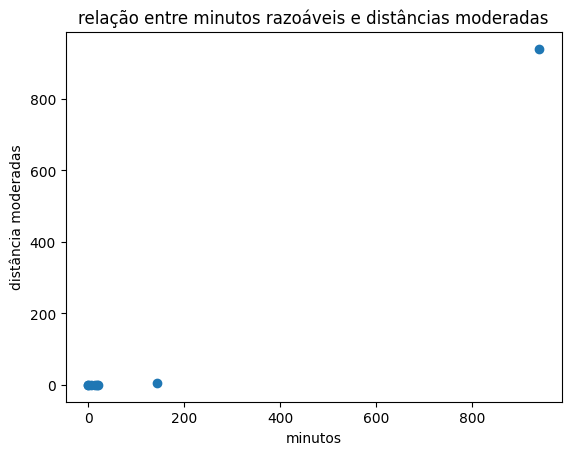

In [406]:
# gráfico de dispersão
plt.scatter(minutos_moderados['FairlyActiveMinutes'], minutos_moderados['ModeratelyActiveDistance'])
plt.title('relação entre minutos razoáveis e distâncias moderadas')
plt.xlabel('minutos')
plt.ylabel('distância moderadas')
plt.show()


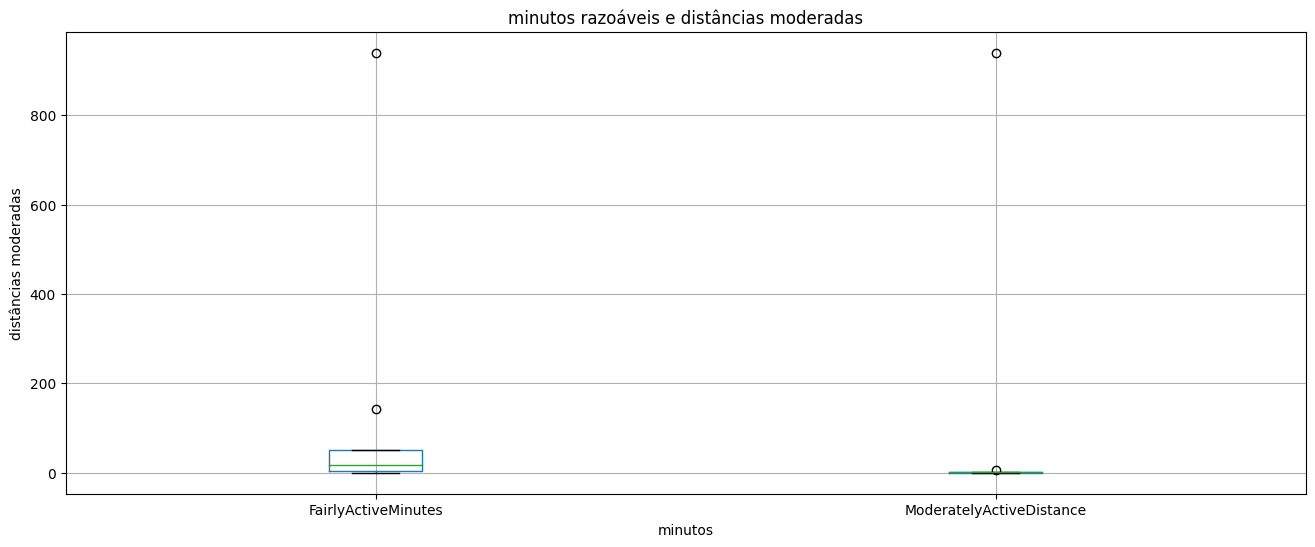

In [501]:
# boxplot
plt.figure(figsize=(16, 6))
minutos_moderados.boxplot()
plt.title('minutos razoáveis e distâncias moderadas')
plt.xlabel('minutos')
plt.ylabel('distâncias moderadas')
plt.show()


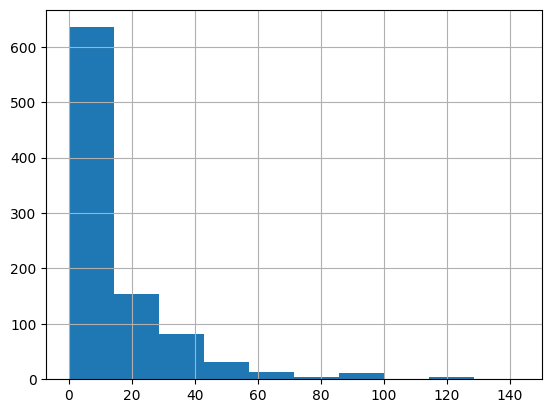

In [408]:
histograma_minutos = atividades['FairlyActiveMinutes'].hist()


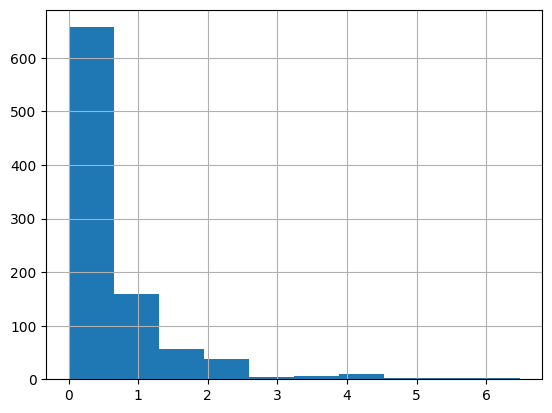

In [409]:
histograma_moderado = atividades['ModeratelyActiveDistance'].hist()


In [410]:
# teste de shapiro pra ver a normalidade
shapiro_results = st.shapiro(minutos_moderados)
shapiro_results

ShapiroResult(statistic=0.4537253975868225, pvalue=8.980931056612462e-07)

In [411]:
# intervalo de confiança


# média e desvio padrão das colunas
media_minutos_moderados = minutos_moderados.mean()
desvio_padrao_minutos_moderados = minutos_moderados.std()

# 95%)
confianca_minutos_moderados = 0.95

# amostra
n = len(minutos_moderados)

# erro padrão
erro_padrao = desvio_padrao_minutos_moderados / np.sqrt(n)

intervalo_minutos_moderados = stats.t.interval(confianca_minutos_moderados, df=n-1, loc=media_minutos_moderados, scale=erro_padrao)

for coluna in minutos_moderados.columns:
    print(f'intervalo de confiança ({confianca_minutos_moderados * 100:.0f}%): {coluna}')
    print(f'média: {media_minutos_moderados[coluna]:.2f}')
    print(f'limite inferior: {intervalo_minutos_moderados[0][minutos_moderados.columns.get_loc(coluna)]:.2f}')
    print(f'limite superior: {intervalo_minutos_moderados[1][minutos_moderados.columns.get_loc(coluna)]:.2f}')
    print()


intervalo de confiança (95%): FairlyActiveMinutes
média: 142.69
limite inferior: -129.52
limite superior: 414.91

intervalo de confiança (95%): ModeratelyActiveDistance
média: 118.62
limite inferior: -158.85
limite superior: 396.09



     Valor Original   Z-score
0                13  1.333213
1                19  0.671309
2                11  0.279069
3                34 -0.250454
4                10  0.833108
..              ...       ...
935               4  1.696035
936              19  1.421467
937              11  1.441079
938              12  1.249862
939               1  0.445771

[940 rows x 2 columns]


<Axes: >

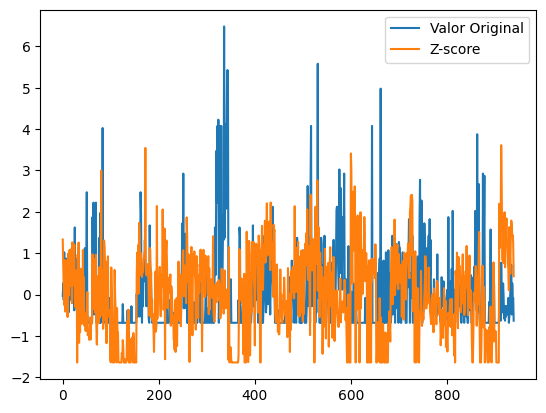

In [412]:
dados_histograma_minutos = atividades['FairlyActiveMinutes']

# cálculo do zscore dos minutos
z_scores_minutos = zscore(dados_histograma_leve)

dados_zscore_minutos = pd.DataFrame({'Valor Original': dados_histograma_minutos, 'Z-score': z_scores_minutos})


print(dados_zscore_minutos)
dados_zscore_minutos.apply(zscore).plot()

### questão 6
será se o sono de uma pessoa tem relação com o tempo que ela passa na cama dormindo com o tempo total de uma atividade muito ativa? Será se o sono é influenciado pelo tempo de atividade física?

In [413]:
atividades.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Calories.1',
       'SedentaryMinutes.1', 'LightlyActiveMinutes.1', 'FairlyActiveMinutes.1',
       'VeryActiveMinutes.1', 'SedentaryActiveDistance.1',
       'LightActiveDistance.1', 'ModeratelyActiveDistance.1',
       'VeryActiveDistance.1', 'StepTotal', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg', 'BMI'],
      dtype='object')

In [414]:
atividades.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Calories.1,SedentaryMinutes.1,LightlyActiveMinutes.1,FairlyActiveMinutes.1,VeryActiveMinutes.1,SedentaryActiveDistance.1,LightActiveDistance.1,ModeratelyActiveDistance.1,VeryActiveDistance.1,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,BMI
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1985,728,328,13,25,0.0,6.06,0.55,1.88,13162,1,327,346,52.599998,22.650000
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1797,776,217,19,21,0.0,4.71,0.69,1.57,10735,2,384,407,52.599998,22.650000
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1776,1218,181,11,30,0.0,3.91,0.40,2.44,10460,0,545,568,133.500000,47.540001
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1745,726,209,34,29,0.0,2.83,1.26,2.14,9762,1,412,442,56.700001,21.450001
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1863,773,221,10,36,0.0,5.04,0.41,2.71,12669,2,340,367,57.299999,21.690001


In [415]:
# agrupamento dos ID e soma do tempo na cama e de minutos muito ativos
dados_agrupados_cama_ativo = atividades.groupby('Id')[['TotalTimeInBed', 'VeryActiveMinutes']].sum()


# lista ordenada por ID
dados_agrupados_cama_ativo = dados_agrupados_cama_ativo.sort_index()
dados_agrupados_cama_ativo


,TotalTimeInBed,VeryActiveMinutes
Id,,
1503960366,12840,1200
1624580081,12840,269
1644430081,12355,287
1844505072,12840,4
1927972279,12840,41
2022484408,12840,1125
2026352035,12840,3
2320127002,12840,42
2347167796,7727,243


In [416]:
# ordem dos ID com mais tempo se sono
dados_ordenados_cama_ativo = dados_agrupados_cama_ativo.sort_values(by='TotalTimeInBed', ascending=False)
dados_ordenados_cama_ativo

,TotalTimeInBed,VeryActiveMinutes
Id,,
1503960366,12840,1200
4319703577,12840,111
8583815059,12840,300
8378563200,12840,1819
8053475328,12840,2640
7086361926,12840,1320
6962181067,12840,707
5553957443,12840,726
4702921684,12840,159


In [417]:
# agrupar por ID e calcular as médias por ID de TotalTimeInBed e VeryActiveMinutes
medias_cama_ativo = atividades.groupby('Id')['TotalTimeInBed', 'VeryActiveMinutes'].mean()
medias_cama_ativo

<ipython-input-417-879629c6bfc9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medias_cama_ativo = atividades.groupby('Id')['TotalTimeInBed', 'VeryActiveMinutes'].mean()


,TotalTimeInBed,VeryActiveMinutes
Id,,
1503960366,414.193548,38.709677
1624580081,414.193548,8.677419
1644430081,411.833333,9.566667
1844505072,414.193548,0.129032
1927972279,414.193548,1.322581
2022484408,414.193548,36.290323
2026352035,414.193548,0.096774
2320127002,414.193548,1.354839
2347167796,429.277778,13.500000


In [418]:
# ordem das médias
medias_ordenadas_cama_ativo = medias_cama_ativo.sort_values(by=['TotalTimeInBed', 'VeryActiveMinutes'], ascending=False)
medias_ordenadas_cama_ativo

,TotalTimeInBed,VeryActiveMinutes
Id,,
4057192912,440.750000,0.750000
2347167796,429.277778,13.500000
8253242879,429.052632,20.526316
3372868164,427.400000,9.150000
6117666160,415.928571,1.571429
6290855005,415.482759,2.758621
8792009665,415.482759,0.965517
8053475328,414.193548,85.161290
8877689391,414.193548,66.064516


<Axes: xlabel='Id'>

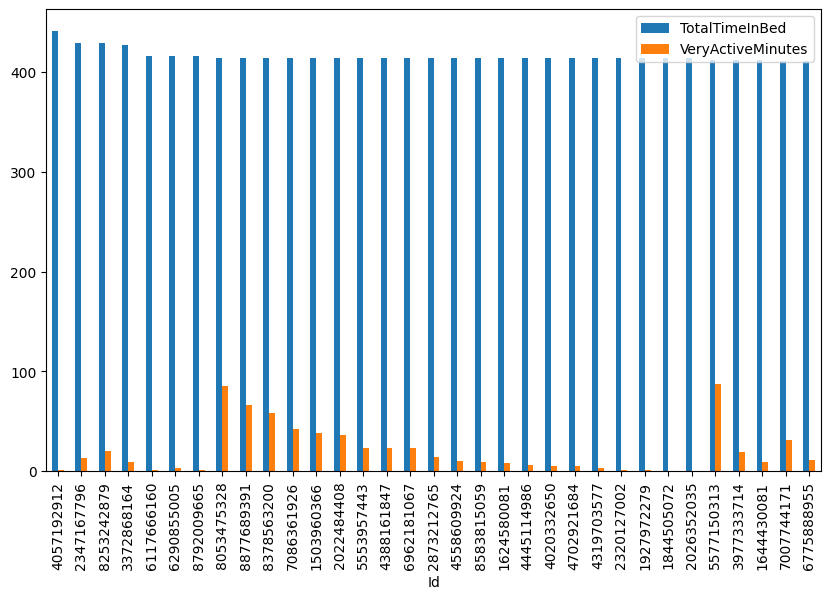

In [419]:
# gráfico de barras das médias do tempo de sono na cama e atividades muito ativas
medias_ordenadas_cama_ativo.plot.bar(y=['TotalTimeInBed', 'VeryActiveMinutes'], figsize=(10, 6))

In [420]:
cama_ativo = atividades[['TotalTimeInBed', 'VeryActiveMinutes']]

cama_ativo = cama_ativo.describe()
cama_ativo

,TotalTimeInBed,VeryActiveMinutes
count,940.000000,940.000000
mean,414.920213,21.164894
std,107.711508,32.844803
min,264.000000,0.000000
25%,346.000000,0.000000
50%,384.000000,4.000000
75%,485.000000,32.000000
max,712.000000,210.000000


In [421]:
# correlação entre tempo de sono na cama e de tempo em atividades muito ativas
correlacao_cama_ativo = cama_ativo['TotalTimeInBed'].corr(cama_ativo['VeryActiveMinutes'])
correlacao_cama_ativo
print(f'correlação entre tempo de sono na cama e de tempo em atividades muito ativas de uma pessoa é de: {correlacao_cama_ativo}')


correlação entre tempo de sono na cama e de tempo em atividades muito ativas de uma pessoa é de: 0.835567465322789


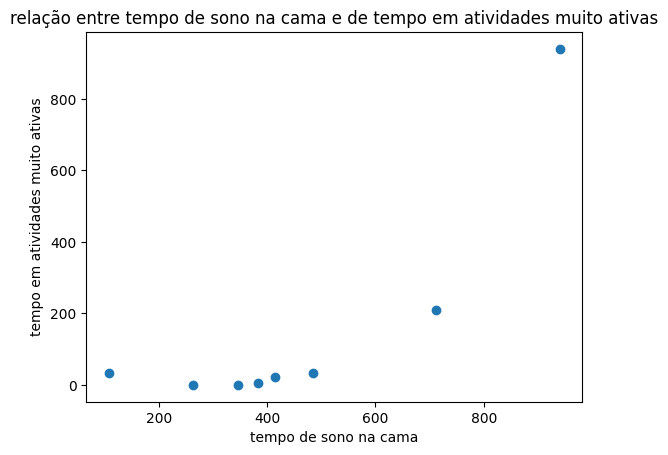

In [422]:
# gráfico de dispersão
plt.scatter(cama_ativo['TotalTimeInBed'], cama_ativo['VeryActiveMinutes'])
plt.title('relação entre tempo de sono na cama e de tempo em atividades muito ativas')
plt.xlabel('tempo de sono na cama')
plt.ylabel('tempo em atividades muito ativas')
plt.show()


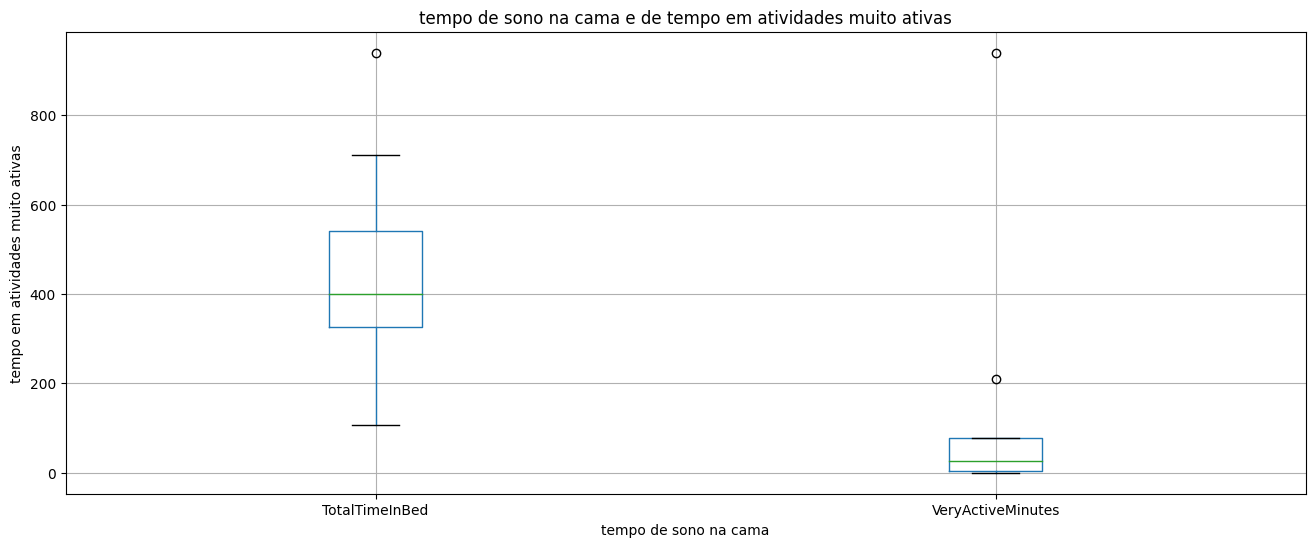

In [502]:
# boxplot
plt.figure(figsize=(16, 6))
cama_ativo.boxplot()
plt.title('tempo de sono na cama e de tempo em atividades muito ativas')
plt.xlabel('tempo de sono na cama')
plt.ylabel('tempo em atividades muito ativas')
plt.show()


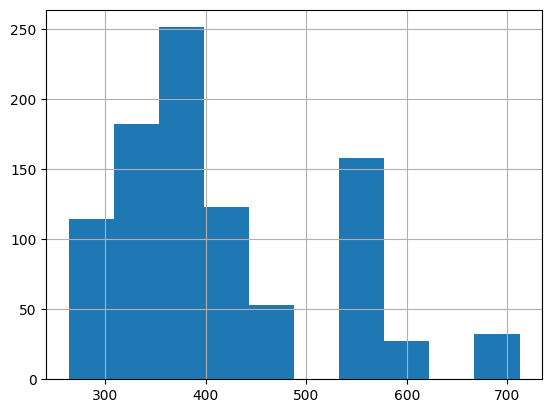

In [424]:
histograma_cama = atividades['TotalTimeInBed'].hist()


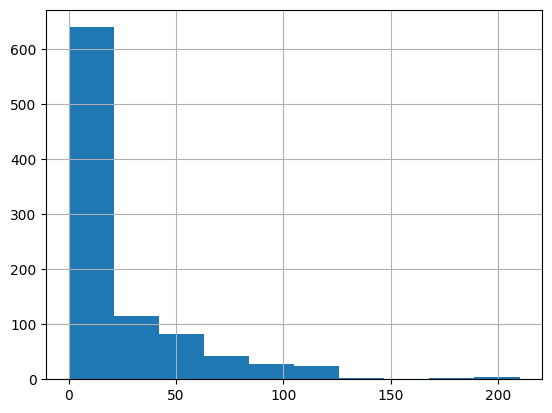

In [425]:
histograma_ativo = atividades['VeryActiveMinutes'].hist()


In [426]:
# teste de shapiro pra ver a normalidade
shapiro_results = st.shapiro(cama_ativo)
shapiro_results

ShapiroResult(statistic=0.8501052260398865, pvalue=0.013672944158315659)

In [427]:
# intervalo de confiança


# média e desvio padrão das colunas
media_cama_ativo = cama_ativo.mean()
desvio_padrao_cama_ativo = cama_ativo.std()

# 95%)
confianca_cama_ativo = 0.95

# amostra
n = len(cama_ativo)

# erro padrão
erro_padrao = desvio_padrao_cama_ativo / np.sqrt(n)

intervalo_cama_ativo = stats.t.interval(confianca_cama_ativo, df=n-1, loc=media_cama_ativo, scale=erro_padrao)

for coluna in cama_ativo.columns:
    print(f'intervalo de confiança ({confianca_cama_ativo * 100:.0f}%): {coluna}')
    print(f'média: {media_cama_ativo[coluna]:.2f}')
    print(f'limite inferior: {intervalo_cama_ativo[0][cama_ativo.columns.get_loc(coluna)]:.2f}')
    print(f'limite superior: {intervalo_cama_ativo[1][cama_ativo.columns.get_loc(coluna)]:.2f}')
    print()


intervalo de confiança (95%): TotalTimeInBed
média: 456.70
limite inferior: 238.29
limite superior: 675.12

intervalo de confiança (95%): VeryActiveMinutes
média: 155.00
limite inferior: -116.46
limite superior: 426.47



     Valor Original   Z-score
0               346 -0.640200
1               407 -0.073571
2               568  1.421958
3               442  0.251544
4               367 -0.445131
..              ...       ...
935             611  1.821385
936             342 -0.677356
937             403 -0.110727
938             306 -1.011760
939             485  0.650971

[940 rows x 2 columns]


<Axes: >

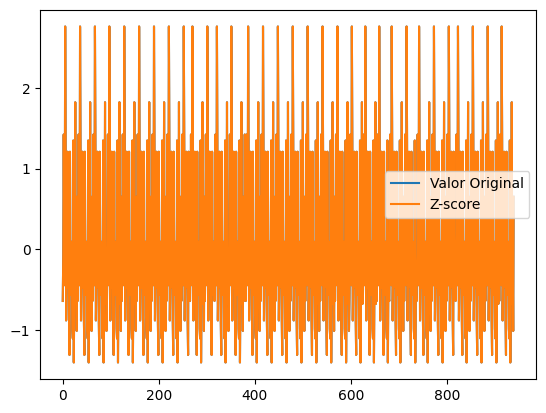

In [428]:
dados_histograma_cama = atividades['TotalTimeInBed']

# cálculo do zscore do tempo de sono na cama
z_scores_cama = zscore(dados_histograma_cama)

dados_zscore_cama = pd.DataFrame({'Valor Original': dados_histograma_cama, 'Z-score': z_scores_cama})


print(dados_zscore_cama)
dados_zscore_cama.apply(zscore).plot()

     Valor Original   Z-score
0                25  0.116827
1                21 -0.005023
2                30  0.269139
3                29  0.238676
4                36  0.451913
..              ...       ...
935              17 -0.126873
936              73  1.579023
937              18 -0.096410
938              88  2.035959
939              23  0.055902

[940 rows x 2 columns]


<Axes: >

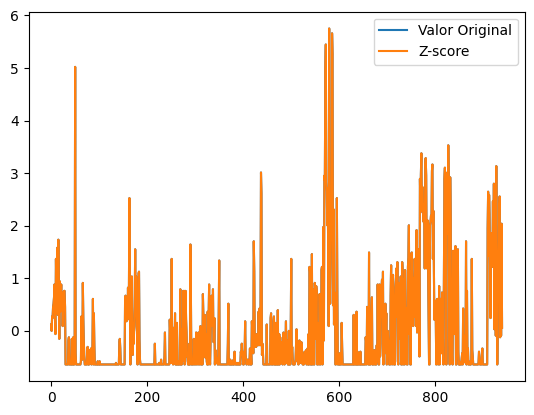

In [429]:
dados_histograma_ativo = atividades['VeryActiveMinutes']

# cálculo do zscore do tempo de atividades muito ativas
z_scores_ativo = zscore(dados_histograma_ativo)

dados_zscore_ativo = pd.DataFrame({'Valor Original': dados_histograma_ativo, 'Z-score': z_scores_ativo})


print(dados_zscore_ativo)
dados_zscore_ativo.apply(zscore).plot()

### questão 7
o índice de massa corporal de uma pessoa possui relação com o total de passos completos em um dia?  

In [430]:
atividades.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Calories.1',
       'SedentaryMinutes.1', 'LightlyActiveMinutes.1', 'FairlyActiveMinutes.1',
       'VeryActiveMinutes.1', 'SedentaryActiveDistance.1',
       'LightActiveDistance.1', 'ModeratelyActiveDistance.1',
       'VeryActiveDistance.1', 'StepTotal', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg', 'BMI'],
      dtype='object')

In [431]:
# agrupamento dos ID e soma do tempo na cama e de minutos muito ativos
dados_agrupados_imc_passos = atividades.groupby('Id')[['BMI', 'TotalSteps']].sum()


# lista ordenada por ID
dados_agrupados_imc_passos = dados_agrupados_imc_passos.sort_index()
dados_agrupados_imc_passos


,BMI,TotalSteps
Id,,
1503960366,787.309994,375619
1624580081,772.790001,178061
1644430081,748.472068,218489
1844505072,789.515578,79982
1927972279,773.054250,28400
2022484408,784.237531,352490
2026352035,782.041670,172573
2320127002,763.033614,146223
2347167796,438.179998,171354


In [432]:
# ordem dos ID com maior IMC
dados_ordenados_imc_passos = dados_agrupados_imc_passos.sort_values(by='BMI', ascending=False)
dados_ordenados_imc_passos

,BMI,TotalSteps
Id,,
4319703577,795.486048,225334
8877689391,790.822024,497241
1844505072,789.515578,79982
8583815059,789.403180,223154
2873212765,789.163594,234229
4558609924,788.536376,238239
4388161847,788.533536,335232
4702921684,787.854264,265734
1503960366,787.309994,375619


In [433]:
# agrupar por ID e calcular as médias por ID de BMI e TotalSteps
medias_imc_passos = atividades.groupby('Id')['BMI', 'TotalSteps'].mean()
medias_imc_passos

<ipython-input-433-b52d0219b9e7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medias_imc_passos = atividades.groupby('Id')['BMI', 'TotalSteps'].mean()


,BMI,TotalSteps
Id,,
1503960366,25.397097,12116.741935
1624580081,24.928710,5743.903226
1644430081,24.949069,7282.966667
1844505072,25.468244,2580.064516
1927972279,24.937234,916.129032
2022484408,25.297985,11370.645161
2026352035,25.227151,5566.870968
2320127002,24.613988,4716.870968
2347167796,24.343333,9519.666667


In [434]:
# ordem das médias
medias_ordenadas_imc_passos = medias_imc_passos.sort_values(by=['BMI', 'TotalSteps'], ascending=False)
medias_ordenadas_imc_passos


,BMI,TotalSteps
Id,,
3977333714,26.075479,10984.566667
4319703577,25.660840,7268.838710
8253242879,25.524968,6482.157895
8877689391,25.510388,16040.032258
1844505072,25.468244,2580.064516
8583815059,25.464619,7198.516129
2873212765,25.456890,7555.774194
7007744171,25.444164,11323.423077
4558609924,25.436657,7685.129032


<Axes: xlabel='Id'>

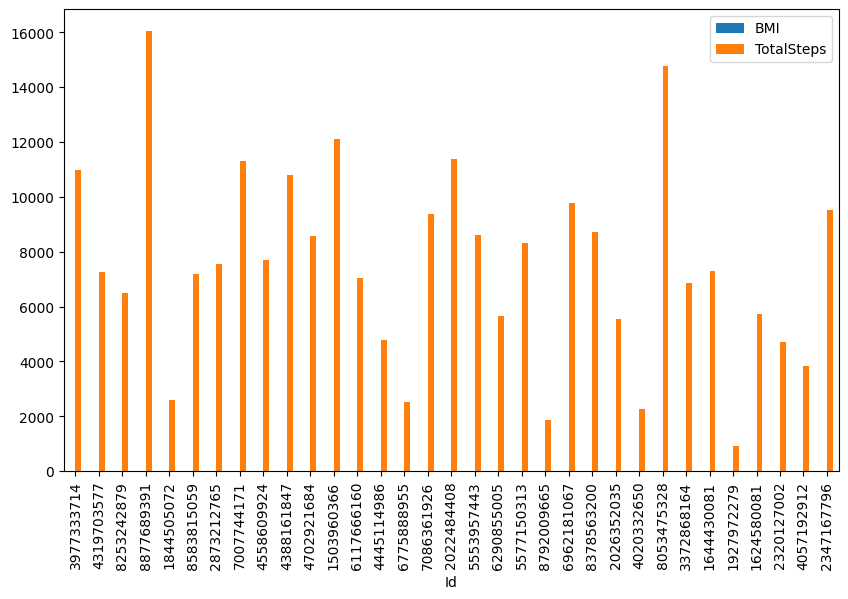

In [435]:
# gráfico de barras das médias do tempo de sono na cama e atividades muito ativas
medias_ordenadas_imc_passos.plot.bar(y=['BMI', 'TotalSteps'], figsize=(10, 6))

In [436]:
imc_passos = atividades[['BMI', 'TotalSteps']]

imc_passos = imc_passos.describe()
imc_passos

,BMI,TotalSteps
count,940.000000,940.000000
mean,25.288562,7637.910638
std,1.351622,5087.150742
min,21.406624,0.000000
25%,24.296741,3789.750000
50%,25.369688,7405.500000
75%,26.140394,10727.000000
max,47.540001,36019.000000


In [437]:
# correlação entre IMC e total de passos
correlacao_imc_passos = imc_passos['BMI'].corr(imc_passos['TotalSteps'])
correlacao_imc_passos
print(f'correlação entre IMC e total de passos de uma pessoa é de: {correlacao_imc_passos}')


correlação entre IMC e total de passos de uma pessoa é de: -0.252775922047985


In [438]:
# correlação de pearson
correlacao_imc_passos = imc_passos['BMI'].corr(imc_passos['TotalSteps'], method='pearson')

print(f'correlação de Pearson entre BMI e TotalSteps: {correlacao}')


correlação de Pearson entre BMI e TotalSteps: 0.9853688433590578


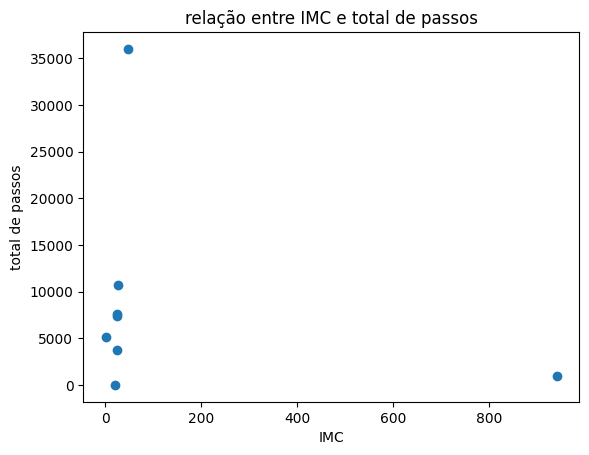

In [439]:
# gráfico de dispersão
plt.scatter(imc_passos['BMI'], imc_passos['TotalSteps'])
plt.title('relação entre IMC e total de passos')
plt.xlabel('IMC')
plt.ylabel('total de passos')
plt.show()


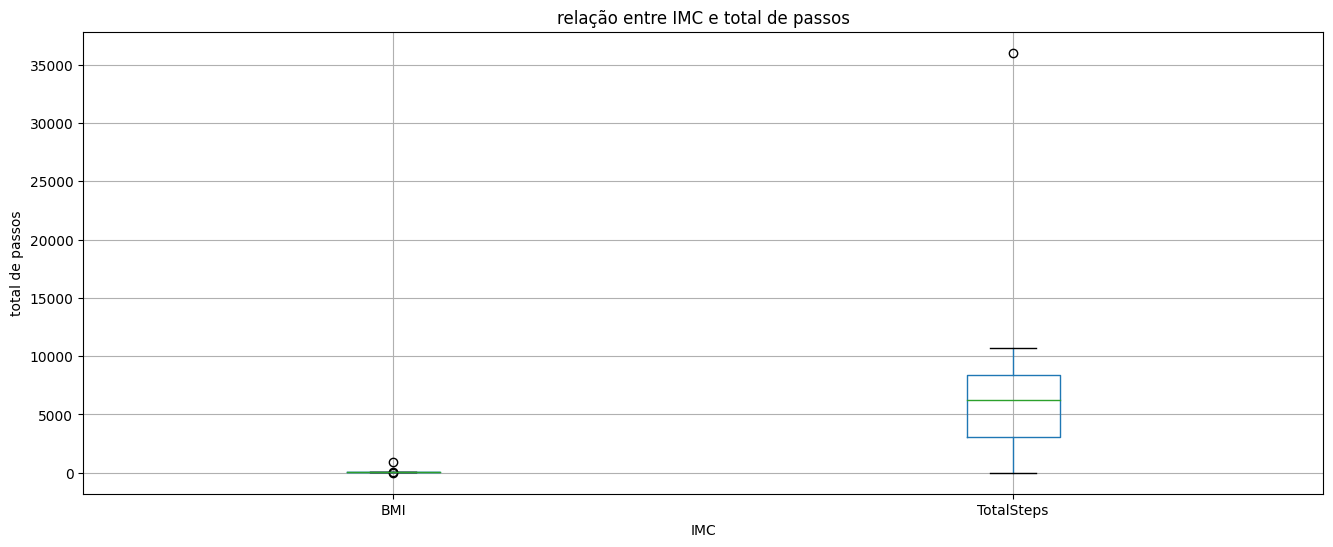

In [503]:
# boxplot
plt.figure(figsize=(16, 6))
imc_passos.boxplot()
plt.title('relação entre IMC e total de passos')
plt.xlabel('IMC')
plt.ylabel('total de passos')
plt.show()


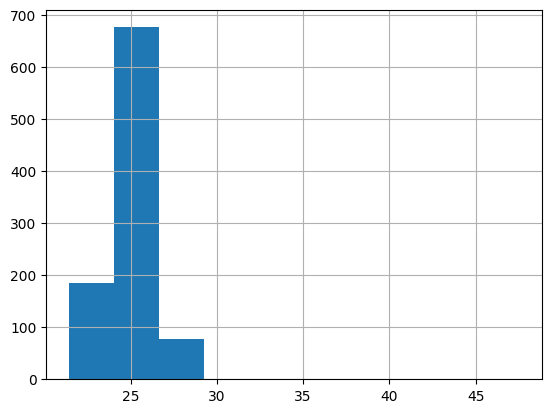

In [441]:
histograma_imc = atividades['BMI'].hist()


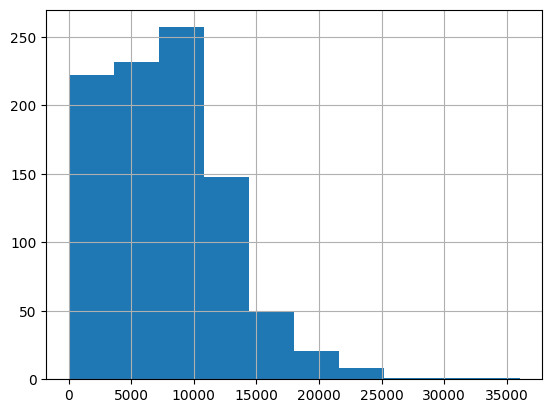

In [442]:
histograma_passos = atividades['TotalSteps'].hist()


In [443]:
# teste de shapiro pra ver a normalidade
shapiro_results = st.shapiro(imc_passos)
shapiro_results

ShapiroResult(statistic=0.5580161809921265, pvalue=6.673985353700118e-06)

In [444]:
# intervalo de confiança


# média e desvio padrão das colunas
media_imc_passos = imc_passos.mean()
desvio_padrao_imc_passos = imc_passos.std()

# 95%)
confianca_imc_passos = 0.95

# amostra
n = len(imc_passos)

# erro padrão
erro_padrao = desvio_padrao_imc_passos / np.sqrt(n)

intervalo_imc_passos = stats.t.interval(confianca_imc_passos, df=n-1, loc=media_imc_passos, scale=erro_padrao)

for coluna in imc_passos.columns:
    print(f'intervalo de confiança ({confianca_imc_passos * 100:.0f}%): {coluna}')
    print(f'média: {media_imc_passos[coluna]:.2f}')
    print(f'limite inferior: {intervalo_imc_passos[0][imc_passos.columns.get_loc(coluna)]:.2f}')
    print(f'limite superior: {intervalo_imc_passos[1][imc_passos.columns.get_loc(coluna)]:.2f}')
    print()


intervalo de confiança (95%): BMI
média: 138.92
limite inferior: -131.88
limite superior: 409.73

intervalo de confiança (95%): TotalSteps
média: 8950.79
limite inferior: -663.75
limite superior: 18565.33



     Valor Original    Z-score
0         22.650000  -1.953185
1         22.650000  -1.953185
2         47.540001  16.471532
3         21.450001  -2.841479
4         21.690001  -2.663820
..              ...        ...
935       24.997947  -0.215127
936       25.661390   0.275984
937       25.525614   0.175477
938       26.450334   0.859996
939       26.468445   0.873403

[940 rows x 2 columns]


<Axes: >

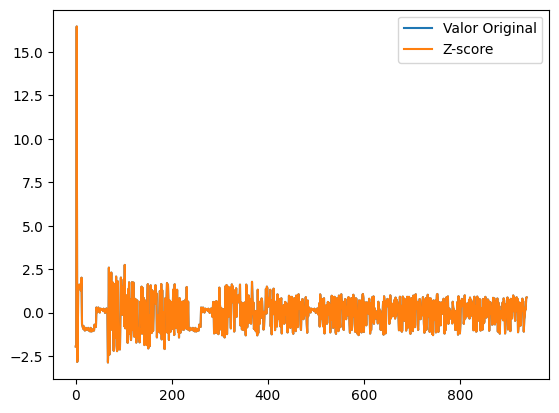

In [445]:
dados_histograma_imc = atividades['BMI']

# cálculo do zscore do IMC
z_scores_imc = zscore(dados_histograma_imc)

dados_zscore_imc = pd.DataFrame({'Valor Original': dados_histograma_imc, 'Z-score': z_scores_imc})


print(dados_zscore_imc)
dados_zscore_imc.apply(zscore).plot()

     Valor Original   Z-score
0             13162  1.086469
1             10735  0.609130
2             10460  0.555044
3              9762  0.417762
4             12669  0.989506
..              ...       ...
935           10686  0.599493
936           20226  2.475804
937           10733  0.608737
938           21420  2.710638
939            8064  0.083803

[940 rows x 2 columns]


<Axes: >

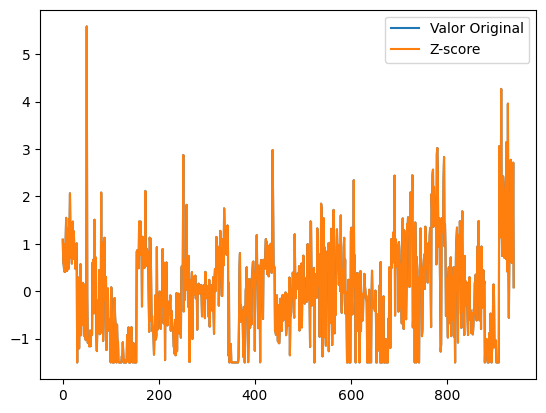

In [446]:
dados_histograma_passos = atividades['TotalSteps']

# cálculo do zscore do total de passos
z_scores_passos = zscore(dados_histograma_passos)

dados_zscore_passos = pd.DataFrame({'Valor Original': dados_histograma_passos, 'Z-score': z_scores_passos})


print(dados_zscore_passos)
dados_zscore_passos.apply(zscore).plot()

### questão 8
o peso possui influência na distância total que alguém irá percorrer?

In [447]:
atividades.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Calories.1',
       'SedentaryMinutes.1', 'LightlyActiveMinutes.1', 'FairlyActiveMinutes.1',
       'VeryActiveMinutes.1', 'SedentaryActiveDistance.1',
       'LightActiveDistance.1', 'ModeratelyActiveDistance.1',
       'VeryActiveDistance.1', 'StepTotal', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg', 'BMI'],
      dtype='object')

In [448]:
# agrupamento dos ID e soma do peso e das distäncias rastreadas
dados_agrupados_peso_rastreio = atividades.groupby('Id')[['WeightKg', 'TrackerDistance']].sum()


# lista ordenada por ID
dados_agrupados_peso_rastreio = dados_agrupados_peso_rastreio.sort_index()
dados_agrupados_peso_rastreio


,WeightKg,TrackerDistance
Id,,
1503960366,2044.100006,242.099999
1624580081,2357.000023,121.360001
1644430081,2055.700012,158.860001
1844505072,2333.600021,52.890000
1927972279,2416.457096,19.670000
2022484408,1801.758374,250.609998
2026352035,1411.949289,107.100000
2320127002,2143.199997,98.819999
2347167796,1201.900009,114.400000


In [449]:
# ordem dos ID com maior peso
dados_ordenados_peso_rastreio = dados_agrupados_peso_rastreio.sort_values(by='WeightKg', ascending=False)
dados_ordenados_peso_rastreio

,WeightKg,TrackerDistance
Id,,
2873212765,2553.621550,158.149999
4388161847,2475.699274,260.190003
8877689391,2472.550823,409.599997
7086361926,2471.355626,198.030000
8583815059,2470.723852,174.079998
8378563200,2467.535088,214.320002
8053475328,2460.885422,355.729997
4558609924,2453.000027,157.500000
4319703577,2439.118412,151.659999


In [450]:
# agrupar por ID e calcular as médias por ID de BMI e TotalSteps
medias_peso_rastreio = atividades.groupby('Id')['WeightKg', 'TrackerDistance'].mean()
medias_peso_rastreio

<ipython-input-450-a72b147514c0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medias_peso_rastreio = atividades.groupby('Id')['WeightKg', 'TrackerDistance'].mean()


,WeightKg,TrackerDistance
Id,,
1503960366,65.938710,7.809677
1624580081,76.032259,3.914839
1644430081,68.523334,5.295333
1844505072,75.277420,1.706129
1927972279,77.950229,0.634516
2022484408,58.121238,8.084193
2026352035,45.546751,3.454839
2320127002,69.135484,3.187742
2347167796,66.772223,6.355556


In [451]:
# ordem das médias
medias_ordenadas_peso_rastreio = medias_peso_rastreio.sort_values(by=['WeightKg', 'TrackerDistance'], ascending=False)
medias_ordenadas_peso_rastreio


,WeightKg,TrackerDistance
Id,,
2873212765,82.374889,5.101613
4057192912,80.467093,2.862500
4388161847,79.861267,8.393226
8877689391,79.759704,13.212903
7086361926,79.721149,6.388065
8583815059,79.700769,5.615484
8378563200,79.597906,6.913548
6775888955,79.388374,1.813462
8053475328,79.383401,11.475161


<Axes: xlabel='Id'>

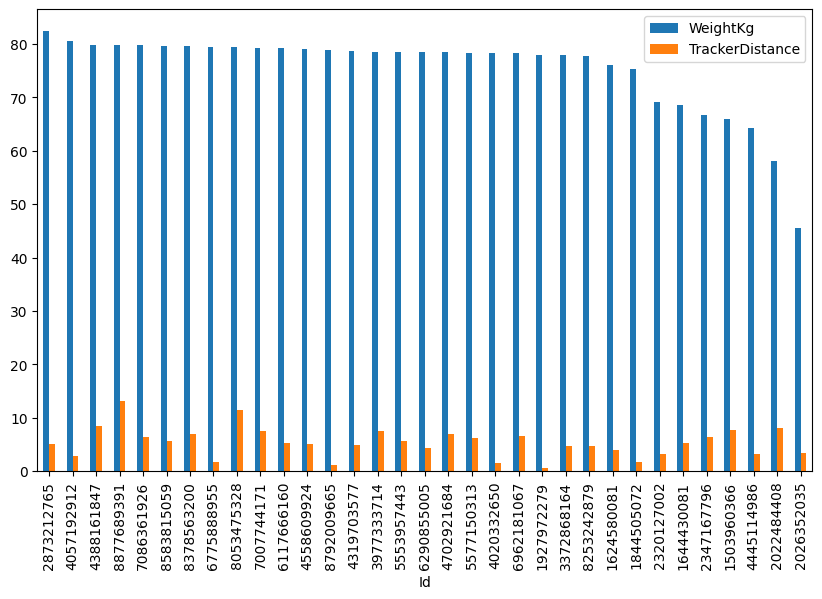

In [452]:
# gráfico de barras dos pesos e das distâncias rastreadas
medias_ordenadas_peso_rastreio.plot.bar(y=['WeightKg', 'TrackerDistance'], figsize=(10, 6))

In [453]:
peso_rastreio = atividades[['WeightKg', 'TrackerDistance']]

peso_rastreio = peso_rastreio.describe()
peso_rastreio

,WeightKg,TrackerDistance
count,940.000000,940.000000
mean,75.236667,5.475351
std,11.671331,3.907276
min,29.605347,0.000000
25%,68.505611,2.620000
50%,76.936085,5.245000
75%,84.794778,7.710000
max,133.500000,28.030001


In [454]:
# correlação entre pesos e as distâncias rastreadas
correlacao_peso_rastreio = peso_rastreio['WeightKg'].corr(peso_rastreio['TrackerDistance'])
correlacao_peso_rastreio
print(f'correlação entre pesos e as distâncias rastreadas de uma pessoa é de: {correlacao_peso_rastreio}')


correlação entre pesos e as distâncias rastreadas de uma pessoa é de: 0.995210764863406


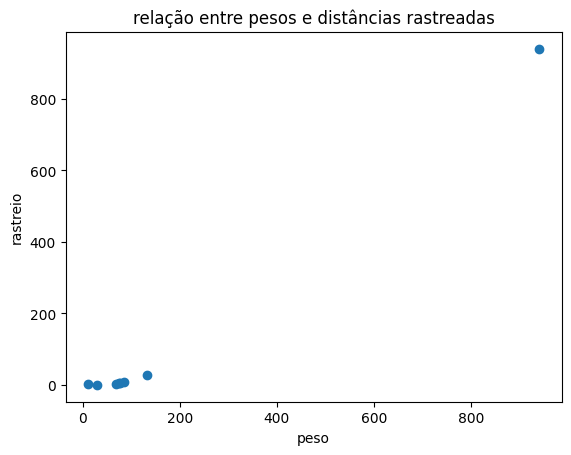

In [455]:
# gráfico de dispersão
plt.scatter(peso_rastreio['WeightKg'], peso_rastreio['TrackerDistance'])
plt.title('relação entre pesos e distâncias rastreadas')
plt.xlabel('peso')
plt.ylabel('rastreio')
plt.show()


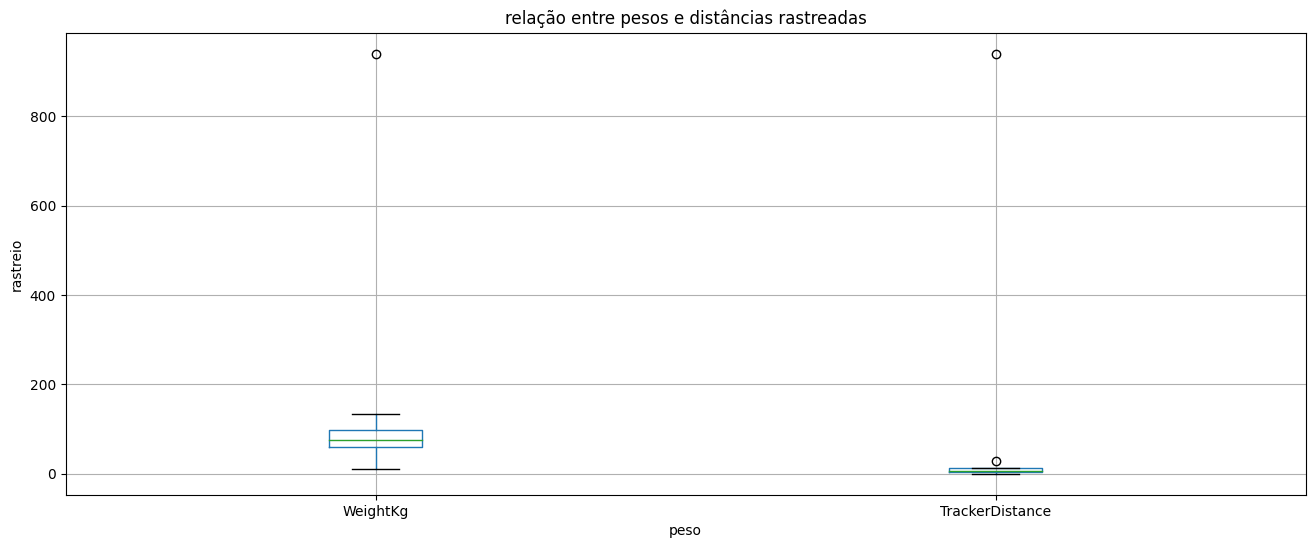

In [504]:
# boxplot
plt.figure(figsize=(16, 6))
peso_rastreio.boxplot()
plt.title('relação entre pesos e distâncias rastreadas')
plt.xlabel('peso')
plt.ylabel('rastreio')
plt.show()


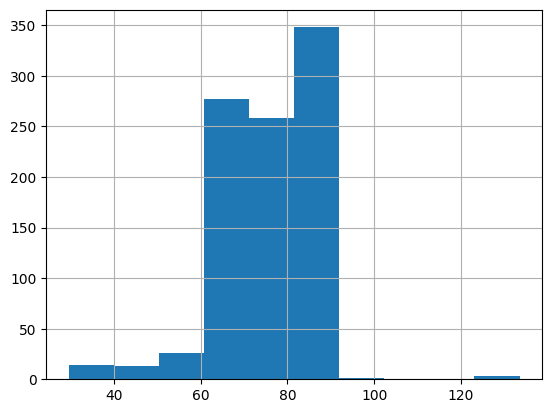

In [457]:
histograma_peso = atividades['WeightKg'].hist()


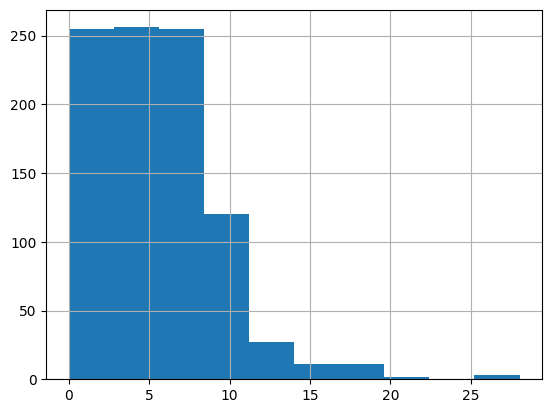

In [458]:
histograma_rastreio = atividades['TrackerDistance'].hist()


In [459]:
# teste de shapiro pra ver a normalidade
shapiro_results = st.shapiro(peso_rastreio)
shapiro_results

ShapiroResult(statistic=0.5026135444641113, pvalue=2.2281262772594346e-06)

In [460]:
# intervalo de confiança


# média e desvio padrão das colunas
media_peso_rastreio = peso_rastreio.mean()
desvio_padrao_peso_rastreio = peso_rastreio.std()

# 95%)
confianca_peso_rastreio = 0.95

# amostra
n = len(peso_rastreio)

# erro padrão
erro_padrao = desvio_padrao_peso_rastreio / np.sqrt(n)

intervalo_peso_rastreio = stats.t.interval(confianca_peso_rastreio, df=n-1, loc=media_peso_rastreio, scale=erro_padrao)

for coluna in peso_rastreio.columns:
    print(f'intervalo de confiança ({confianca_peso_rastreio * 100:.0f}%): {coluna}')
    print(f'média: {media_peso_rastreio[coluna]:.2f}')
    print(f'limite inferior: {intervalo_peso_rastreio[0][peso_rastreio.columns.get_loc(coluna)]:.2f}')
    print(f'limite superior: {intervalo_peso_rastreio[1][peso_rastreio.columns.get_loc(coluna)]:.2f}')
    print()


intervalo de confiança (95%): WeightKg
média: 177.53
limite inferior: -81.84
limite superior: 436.90

intervalo de confiança (95%): TrackerDistance
média: 124.12
limite inferior: -151.58
limite superior: 399.82



     Valor Original   Z-score
0         52.599998 -1.940543
1         52.599998 -1.940543
2        133.500000  4.994662
3         56.700001 -1.589068
4         57.299999 -1.537632
..              ...       ...
935       81.759704  0.559192
936       89.759704  1.244997
937       70.759704 -0.383791
938       77.759704  0.216289
939       89.759704  1.244997

[940 rows x 2 columns]


<Axes: >

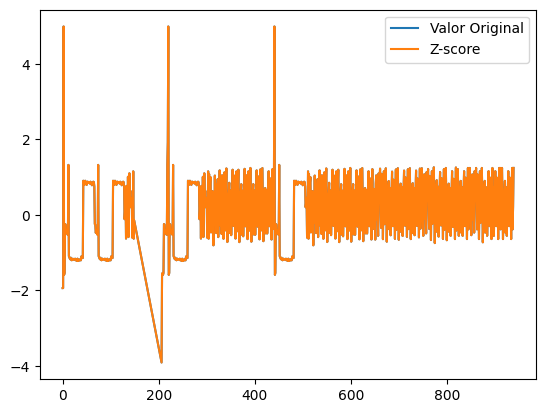

In [461]:
dados_histograma_peso = atividades['WeightKg']

# cálculo do zscore do peso
z_scores_peso = zscore(dados_histograma_peso)

dados_zscore_peso = pd.DataFrame({'Valor Original': dados_histograma_peso, 'Z-score': z_scores_peso})


print(dados_zscore_peso)
dados_zscore_peso.apply(zscore).plot()

     Valor Original   Z-score
0          8.500000  0.774519
1          6.970000  0.382733
2          6.740000  0.323837
3          6.280000  0.206046
4          8.160000  0.687455
..              ...       ...
935        8.110000  0.674652
936       18.250000  3.271192
937        8.150000  0.684895
938       19.559999  3.606642
939        6.120000  0.165075

[940 rows x 2 columns]


<Axes: >

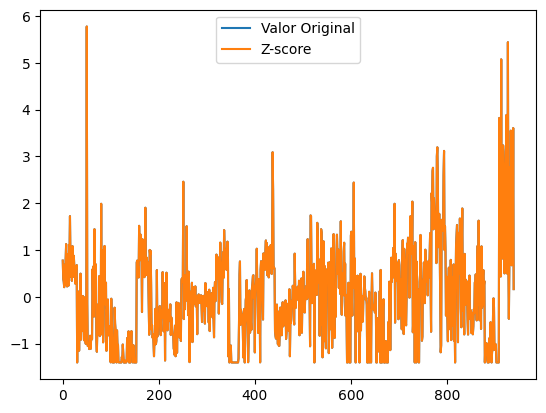

In [462]:
dados_histograma_rastreio = atividades['TrackerDistance']

# cálculo do zscore do rastreio
z_scores_rastreio = zscore(dados_histograma_rastreio)

dados_zscore_rastreio = pd.DataFrame({'Valor Original': dados_histograma_rastreio, 'Z-score': z_scores_rastreio})


print(dados_zscore_rastreio)
dados_zscore_rastreio.apply(zscore).plot()

### questão 9
qual a relação entre os minutos sedentários e as calorias gastas pelas pessoas?

In [339]:
atividades.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Calories.1',
       'SedentaryMinutes.1', 'LightlyActiveMinutes.1', 'FairlyActiveMinutes.1',
       'VeryActiveMinutes.1', 'SedentaryActiveDistance.1',
       'LightActiveDistance.1', 'ModeratelyActiveDistance.1',
       'VeryActiveDistance.1', 'StepTotal', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg', 'BMI'],
      dtype='object')

In [505]:
# agrupamento dos ID e soma dos minutos sedentários e as calorias gastas
dados_agrupados_sedentario_calorias = atividades.groupby('Id')[['SedentaryMinutes', 'Calories']].sum()


# lista ordenada por ID
dados_agrupados_sedentario_calorias = dados_agrupados_sedentario_calorias.sort_index()
dados_agrupados_sedentario_calorias


,SedentaryMinutes,Calories
Id,,
1503960366,26293,56309
1624580081,38990,45984
1644430081,34856,84339
1844505072,37405,48778
1927972279,40840,67357
2022484408,34490,77809
2026352035,21372,47760
2320127002,37823,53449
2347167796,12369,36782


In [506]:
# ordem dos ID mais sedentários
dados_ordenados_sedentario_calorias = dados_agrupados_sedentario_calorias.sort_values(by='SedentaryMinutes', ascending=False)
dados_ordenados_sedentario_calorias

,SedentaryMinutes,Calories
Id,,
1927972279,40840,67357
8583815059,39284,84693
1624580081,38990,45984
4020332650,38355,73960
2320127002,37823,53449
1844505072,37405,48778
8053475328,35588,91320
1644430081,34856,84339
6290855005,34598,75389


In [507]:
# agrupar por ID e calcular as médias por SedentaryMinutes de BMI e Calories
medias_sedentario_calorias = atividades.groupby('Id')['SedentaryMinutes', 'Calories'].mean()
medias_sedentario_calorias

<ipython-input-507-114b64081c1c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medias_sedentario_calorias = atividades.groupby('Id')['SedentaryMinutes', 'Calories'].mean()


,SedentaryMinutes,Calories
Id,,
1503960366,848.161290,1816.419355
1624580081,1257.741935,1483.354839
1644430081,1161.866667,2811.300000
1844505072,1206.612903,1573.483871
1927972279,1317.419355,2172.806452
2022484408,1112.580645,2509.967742
2026352035,689.419355,1540.645161
2320127002,1220.096774,1724.161290
2347167796,687.166667,2043.444444


In [508]:
# ordem das médias
medias_ordenadas_sedentario_calorias = medias_sedentario_calorias.sort_values(by=['SedentaryMinutes', 'Calories'], ascending=False)
medias_ordenadas_sedentario_calorias


,SedentaryMinutes,Calories
Id,,
1927972279,1317.419355,2172.806452
6775888955,1299.423077,2131.769231
8253242879,1287.368421,1788.000000
8583815059,1267.225806,2732.032258
1624580081,1257.741935,1483.354839
4020332650,1237.258065,2385.806452
2320127002,1220.096774,1724.161290
4057192912,1217.250000,1973.750000
1844505072,1206.612903,1573.483871


<Axes: xlabel='Id'>

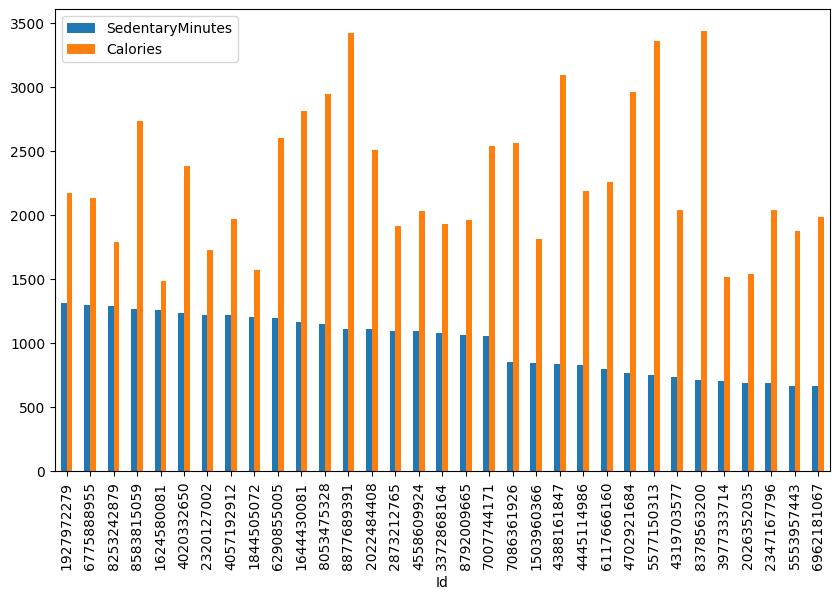

In [509]:
# gráfico de barras do tempo sedentário e das calorias
medias_ordenadas_sedentario_calorias.plot.bar(y=['SedentaryMinutes', 'Calories'], figsize=(10, 6))

In [510]:
sedentario_calorias = atividades[['SedentaryMinutes', 'Calories']]

sedentario_calorias = sedentario_calorias.describe()
sedentario_calorias

,SedentaryMinutes,Calories
count,940.000000,940.000000
mean,991.210638,2303.609574
std,301.267437,718.166862
min,0.000000,0.000000
25%,729.750000,1828.500000
50%,1057.500000,2134.000000
75%,1229.500000,2793.250000
max,1440.000000,4900.000000


In [511]:
# correlação entre tempo sedentário e as calorias
correlacao_sedentario_calorias = sedentario_calorias['SedentaryMinutes'].corr(sedentario_calorias['Calories'])
correlacao_sedentario_calorias
print(f'correlação entre tempo sedentário e as calorias de uma pessoa é de: {correlacao_sedentario_calorias}')


correlação entre tempo sedentário e as calorias de uma pessoa é de: 0.8728733482747147


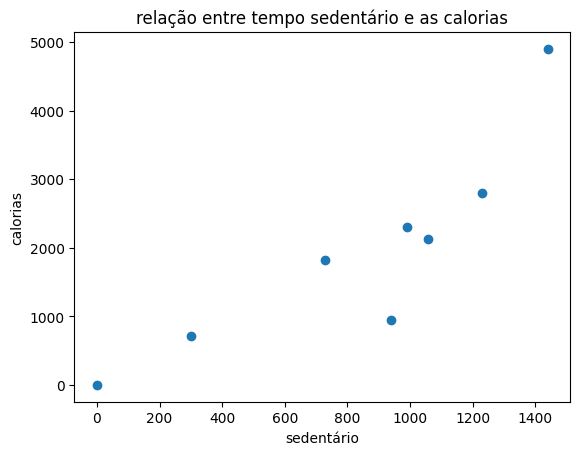

In [512]:
# gráfico de dispersão
plt.scatter(sedentario_calorias['SedentaryMinutes'], sedentario_calorias['Calories'])
plt.title('relação entre tempo sedentário e as calorias')
plt.xlabel('sedentário')
plt.ylabel('calorias')
plt.show()


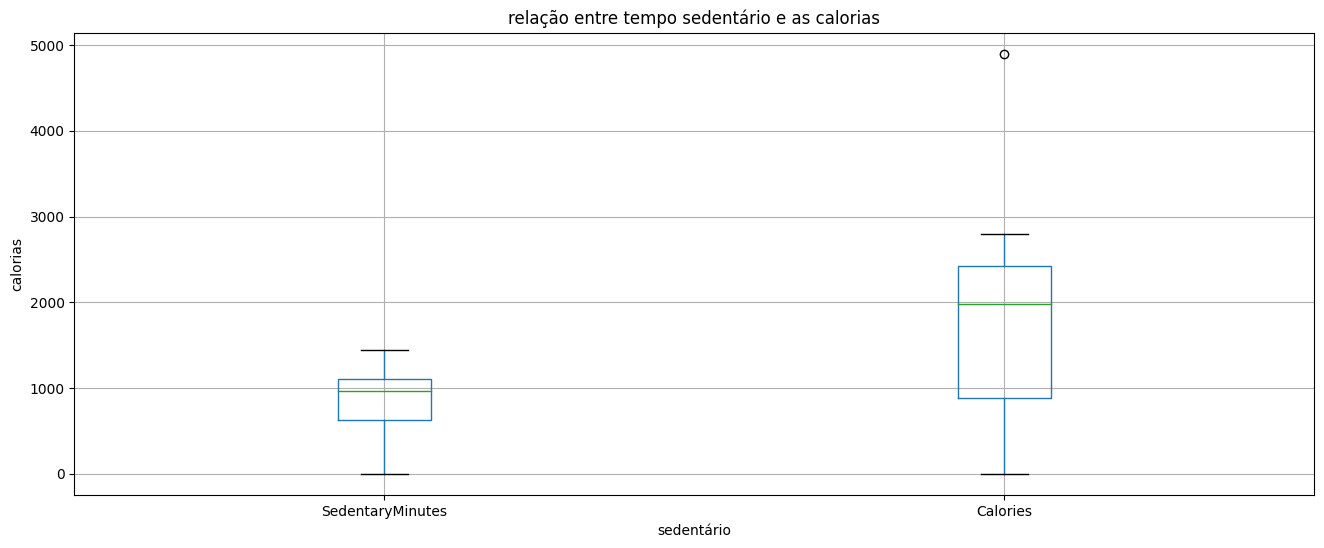

In [514]:
# boxplot
plt.figure(figsize=(16, 6))
sedentario_calorias.boxplot()
plt.title('relação entre tempo sedentário e as calorias')
plt.xlabel('sedentário')
plt.ylabel('calorias')
plt.show()


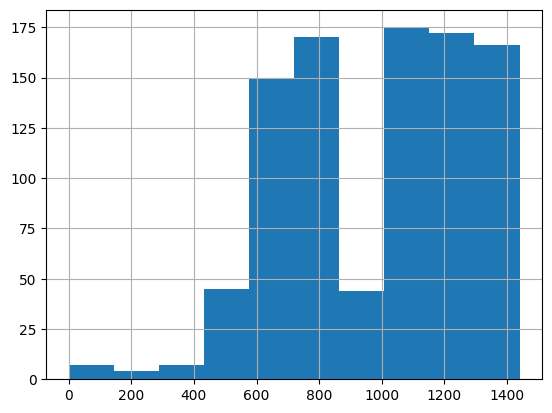

In [515]:
histograma_sedentario = atividades['SedentaryMinutes'].hist()


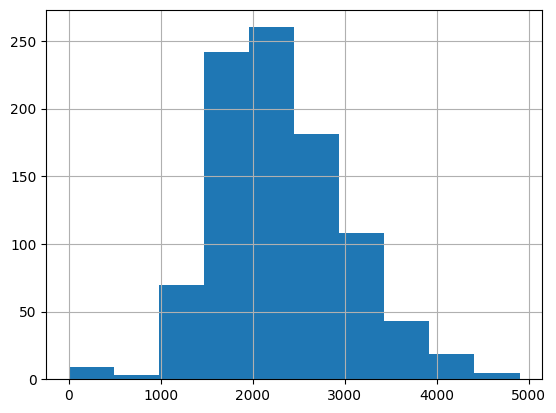

In [516]:
histograma_calorias = atividades['Calories'].hist()


In [517]:
# teste de shapiro pra ver a normalidade
shapiro_results = st.shapiro(sedentario_calorias)
shapiro_results

ShapiroResult(statistic=0.8614934086799622, pvalue=0.02020164020359516)

In [519]:
# intervalo de confiança


# média e desvio padrão das colunas
media_sedentario_calorias = sedentario_calorias.mean()
desvio_padrao_sedentario_calorias = sedentario_calorias.std()

# 95%)
confianca_sedentario_calorias = 0.95

# amostra
n = len(sedentario_calorias)

# erro padrão
erro_padrao = desvio_padrao_sedentario_calorias / np.sqrt(n)

intervalo_sedentario_calorias = stats.t.interval(confianca_sedentario_calorias, df=n-1, loc=media_sedentario_calorias, scale=erro_padrao)

for coluna in sedentario_calorias.columns:
    print(f'intervalo de confiança ({confianca_sedentario_calorias * 100:.0f}%): {coluna}')
    print(f'média: {media_sedentario_calorias[coluna]:.2f}')
    print(f'limite inferior: {intervalo_sedentario_calorias[0][sedentario_calorias.columns.get_loc(coluna)]:.2f}')
    print(f'limite superior: {intervalo_sedentario_calorias[1][sedentario_calorias.columns.get_loc(coluna)]:.2f}')
    print()


intervalo de confiança (95%): SedentaryMinutes
média: 836.15
limite inferior: 436.49
limite superior: 1235.82

intervalo de confiança (95%): Calories
média: 1952.19
limite inferior: 691.12
limite superior: 3213.26



     Valor Original   Z-score
0               728 -0.874143
1               776 -0.714731
2              1218  0.753185
3               726 -0.880785
4               773 -0.724694
..              ...       ...
935            1174  0.607058
936            1131  0.464251
937            1187  0.650232
938            1127  0.450967
939             770 -0.734658

[940 rows x 2 columns]


<Axes: >

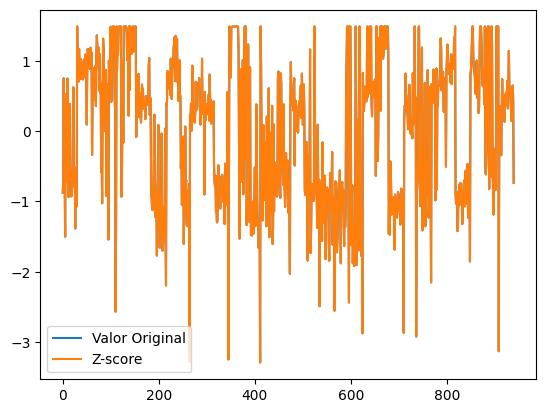

In [520]:
dados_histograma_sedentario = atividades['SedentaryMinutes']

# cálculo do zscore do tempo sedentário
z_scores_sedentario = zscore(dados_histograma_sedentario)

dados_zscore_sedentario = pd.DataFrame({'Valor Original': dados_histograma_sedentario, 'Z-score': z_scores_sedentario})


print(dados_zscore_sedentario)
dados_zscore_sedentario.apply(zscore).plot()

     Valor Original   Z-score
0               728 -0.874143
1               776 -0.714731
2              1218  0.753185
3               726 -0.880785
4               773 -0.724694
..              ...       ...
935            1174  0.607058
936            1131  0.464251
937            1187  0.650232
938            1127  0.450967
939             770 -0.734658

[940 rows x 2 columns]


<Axes: >

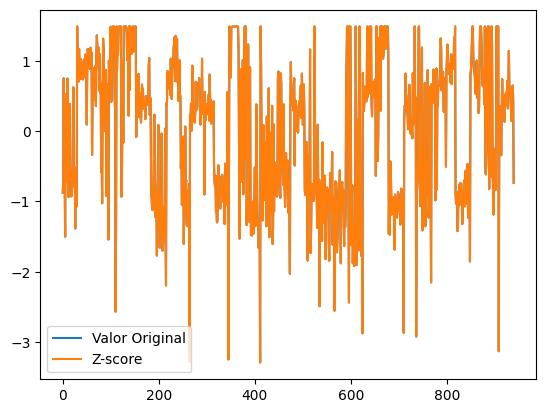

In [521]:
dados_histograma_calorias = atividades['SedentaryMinutes']

# cálculo do zscore das calorias
z_scores_calorias = zscore(dados_histograma_calorias)

dados_zscore_calorias = pd.DataFrame({'Valor Original': dados_histograma_calorias, 'Z-score': z_scores_calorias})


print(dados_zscore_calorias)
dados_zscore_calorias.apply(zscore).plot()

### questão 10
qual a relação da distância entre os diferentes níveis de atividade? (muito ativo, moderado e leve)

In [479]:
atividades.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Calories.1',
       'SedentaryMinutes.1', 'LightlyActiveMinutes.1', 'FairlyActiveMinutes.1',
       'VeryActiveMinutes.1', 'SedentaryActiveDistance.1',
       'LightActiveDistance.1', 'ModeratelyActiveDistance.1',
       'VeryActiveDistance.1', 'StepTotal', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg', 'BMI'],
      dtype='object')

In [522]:
# agrupamento dos ID e soma da distância percorrida em diferentes níveis de atividade
dados_agrupados_distancia = atividades.groupby('Id')[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']].sum()

# lista ordenada por ID
dados_agrupados_distancia = dados_agrupados_distancia.sort_index()


print(dados_agrupados_distancia)


            VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance
Id                                                                           
1503960366           88.610000                 24.620000           128.740000
1624580081           29.120000                 11.180000            80.810000
1644430081           21.900000                 28.530000           108.270001
1844505072            0.260000                  1.520000            51.069999
1927972279            2.970000                  0.970000            15.720000
2022484408           75.069999                 22.320000           153.220000
2026352035            0.190000                  0.350000           106.520000
2320127002            3.310000                  3.030000            92.390000
2347167796           19.070000                 19.350000            75.990001
2873212765           20.960000                  8.560000           128.450001
3372868164           12.590000                  3.060000        

In [523]:
# ordem dos ID pela distância percorrida em diferentes níveis
dados_ordenados_distancia = dados_agrupados_distancia.sort_values(by=['VeryActiveDistance'], ascending=False)

dados_ordenados_distancia


,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance
Id,,,
8053475328,263.960001,13.140000,78.550000
8877689391,205.760000,10.470000,191.850000
5577150313,93.410000,19.740000,72.840000
1503960366,88.610000,24.620000,128.740000
7086361926,86.220000,23.970000,87.380000
8378563200,77.610000,16.090000,120.569999
2022484408,75.069999,22.320000,153.220000
7007744171,62.790000,19.200000,126.400000
4388161847,53.300000,27.960000,167.280000


In [524]:
# agrupar por ID e as médias por distância percorrida em diferentes níveis
medias_distancia = atividades.groupby('Id')['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance'].mean()

medias_distancia


<ipython-input-524-ebb7e0156ffd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medias_distancia = atividades.groupby('Id')['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance'].mean()


,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance
Id,,,
1503960366,2.858387,0.794194,4.152903
1624580081,0.939355,0.360645,2.606774
1644430081,0.730000,0.951000,3.609000
1844505072,0.008387,0.049032,1.647419
1927972279,0.095806,0.031290,0.507097
2022484408,2.421613,0.720000,4.942581
2026352035,0.006129,0.011290,3.436129
2320127002,0.106774,0.097742,2.980323
2347167796,1.059444,1.075000,4.221667


In [525]:
# ordenar as médias por distância percorrida em diferentes níveis de atividade
medias_ordenadas_distancia = medias_distancia.sort_values(by=['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance'], ascending=False)

medias_ordenadas_distancia


,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance
Id,,,
8053475328,8.514839,0.423871,2.533871
8877689391,6.637419,0.337742,6.188710
5577150313,3.113667,0.658000,2.428000
1503960366,2.858387,0.794194,4.152903
7086361926,2.781290,0.773226,2.818710
8378563200,2.503548,0.519032,3.889355
2022484408,2.421613,0.720000,4.942581
7007744171,2.415000,0.738462,4.861538
8253242879,2.214210,0.695789,1.754737


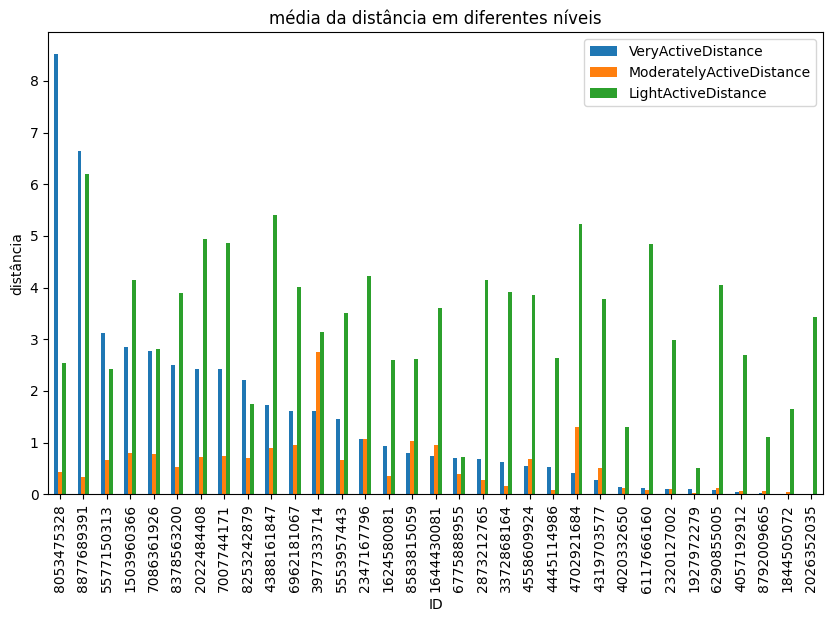

In [526]:
# gráfico de barras da distância percorrida em diferentes níveis de atividade
medias_ordenadas_distancia.plot.bar(y=['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance'], figsize=(10, 6))

# títulos
plt.title('média da distância em diferentes níveis')
plt.xlabel('ID')
plt.ylabel('distância')

plt.show()


In [527]:
distancia_atividade = atividades[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']]

distancia_atividade = distancia_atividade.describe()
distancia_atividade


,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance
count,940.000000,940.000000,940.000000
mean,1.502681,0.567543,3.340819
std,2.658941,0.883580,2.040655
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.945000
50%,0.210000,0.240000,3.365000
75%,2.052500,0.800000,4.782500
max,21.920000,6.480000,10.710000


In [528]:
# correlação entre as distâncias percorridas
distancia_atividade = atividades[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']]

correlacao_distancia = distancia_atividade.corr()
print(f'correlação entre as distâncias percorridas de uma pessoa é de: {correlacao_distancia}')



correlação entre as distâncias percorridas de uma pessoa é de:                           VeryActiveDistance  ModeratelyActiveDistance  \
VeryActiveDistance                  1.000000                  0.192986   
ModeratelyActiveDistance            0.192986                  1.000000   
LightActiveDistance                 0.157669                  0.237847   

                          LightActiveDistance  
VeryActiveDistance                   0.157669  
ModeratelyActiveDistance             0.237847  
LightActiveDistance                  1.000000  


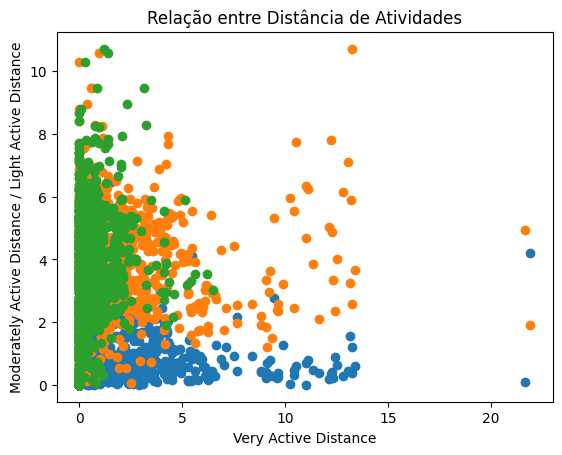

In [529]:
# gráfico de dispersão
plt.scatter(distancia_atividade['VeryActiveDistance'], distancia_atividade['ModeratelyActiveDistance'])
plt.scatter(distancia_atividade['VeryActiveDistance'], distancia_atividade['LightActiveDistance'])
plt.scatter(distancia_atividade['ModeratelyActiveDistance'], distancia_atividade['LightActiveDistance'])
plt.title('Relação entre Distância de Atividades')
plt.xlabel('Very Active Distance')
plt.ylabel('Moderately Active Distance / Light Active Distance')
plt.show()


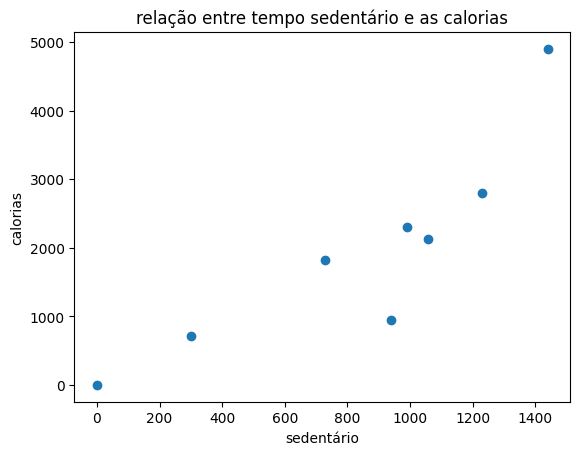

In [530]:
# gráfico de dispersão
plt.scatter(sedentario_calorias['SedentaryMinutes'], sedentario_calorias['Calories'])
plt.title('relação entre tempo sedentário e as calorias')
plt.xlabel('sedentário')
plt.ylabel('calorias')
plt.show()


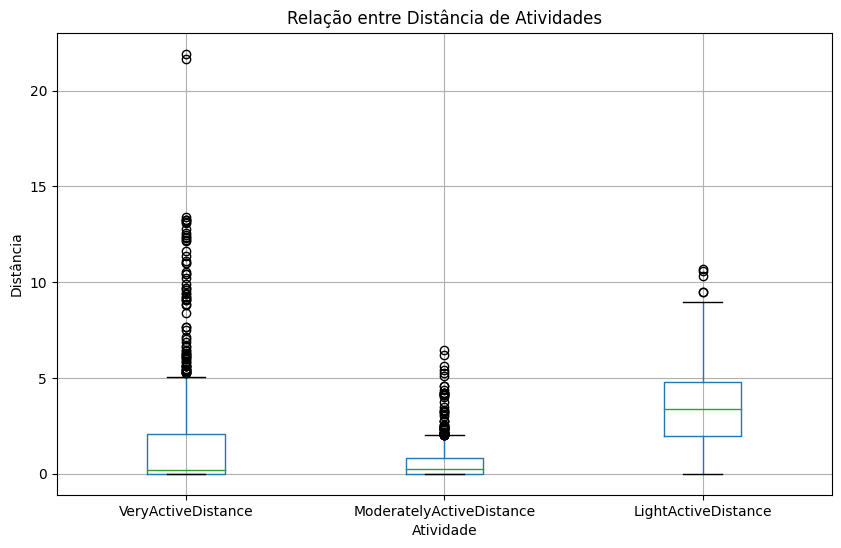

In [531]:
# boxplot
plt.figure(figsize=(10, 6))
distancia_atividade.boxplot()
plt.title('Relação entre Distância de Atividades')
plt.xlabel('Atividade')
plt.ylabel('Distância')
plt.show()


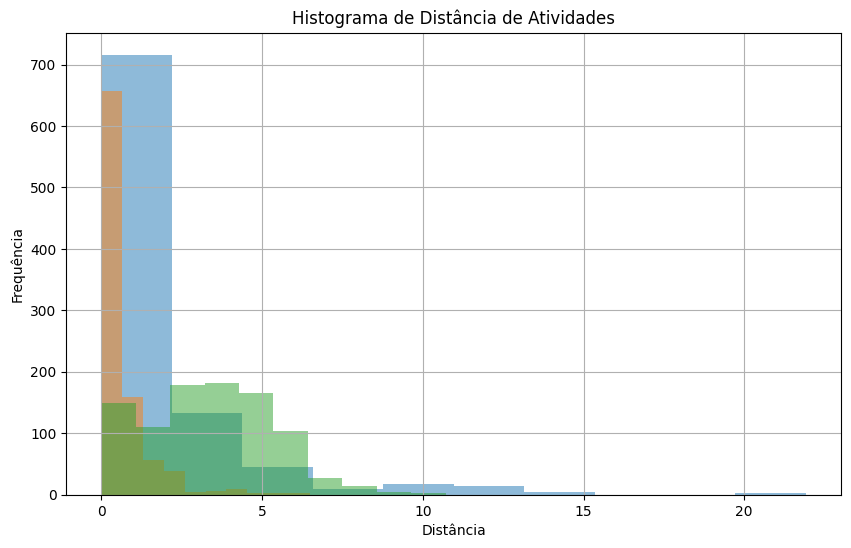

In [532]:
# histograma das colunas
plt.figure(figsize=(10, 6))
for coluna in distancia_atividade.columns:
    distancia_atividade[coluna].hist(alpha=0.5)

# Definir o título e os rótulos dos eixos
plt.title('Histograma de Distância de Atividades')
plt.xlabel('Distância')
plt.ylabel('Frequência')
plt.show()



In [533]:
# teste de shapiro pra ver a normalidade
shapiro_results = st.shapiro(distancia_atividade)
shapiro_results

ShapiroResult(statistic=0.7783677577972412, pvalue=0.0)

In [534]:
# intervalo de confiança


# média e o desvio padrão de cada coluna
media_distancia = distancia_atividade.mean()
desvio_padrao_distancia = distancia_atividade.std()

# 95%
confianca = 0.95

# amostra
n = len(distancia_atividade)

# erro padrão
erro_padrao = desvio_padrao_distancia / np.sqrt(n)

intervalo_confianca = stats.t.interval(confianca, df=n-1, loc=media_distancia, scale=erro_padrao)

for coluna in distancia_atividade.columns:
    print(f"Intervalo de confiança ({confianca * 100:.0f}%): {coluna}")
    print(f"Média: {media_distancia[coluna]:.2f}")
    print(f"Limite Inferior: {intervalo_confianca[0][distancia_atividade.columns.get_loc(coluna)]:.2f}")
    print(f"Limite Superior: {intervalo_confianca[1][distancia_atividade.columns.get_loc(coluna)]:.2f}")
    print()


Intervalo de confiança (95%): VeryActiveDistance
Média: 1.50
Limite Inferior: 1.33
Limite Superior: 1.67

Intervalo de confiança (95%): ModeratelyActiveDistance
Média: 0.57
Limite Inferior: 0.51
Limite Superior: 0.62

Intervalo de confiança (95%): LightActiveDistance
Média: 3.34
Limite Inferior: 3.21
Limite Superior: 3.47

